In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from homebrewedFunctions.functions import *

data_cats = ["NoTaxRatios","WithTaxRatios"]
dfs_dct = {}
for data_cat in data_cats:
    filename = f"panelData{data_cat}.xlsx"
    dfs_dct[data_cat] = pd.read_excel(filename,sheet_name=None)
    for key, df in dfs_dct[data_cat].items():
        dfs_dct[data_cat][key].set_index(["State","DATE"], inplace = True)
        del dfs_dct[data_cat][key]["Unnamed: 0"]
dfs_dct

{'NoTaxRatios': {'Levels':                   Population  Home Price Index  EFNA  Overall-scores(allgovs)  \
  State DATE                                                                      
  AL    1900-01-01     1830.00               NaN   NaN                      NaN   
        1901-01-01     1907.00               NaN   NaN                      NaN   
        1902-01-01     1935.00               NaN   NaN                      NaN   
        1903-01-01     1957.00               NaN   NaN                      NaN   
        1904-01-01     1978.00               NaN   NaN                      NaN   
  ...                      ...               ...   ...                      ...   
  WY    2019-01-01      580.12            324.49  8.16                 8.156352   
        2020-01-01      577.66            340.92  8.01                 8.009364   
        2021-01-01      579.55            380.47  7.99                 7.988226   
        2022-01-01      581.63            438.83   NaN        

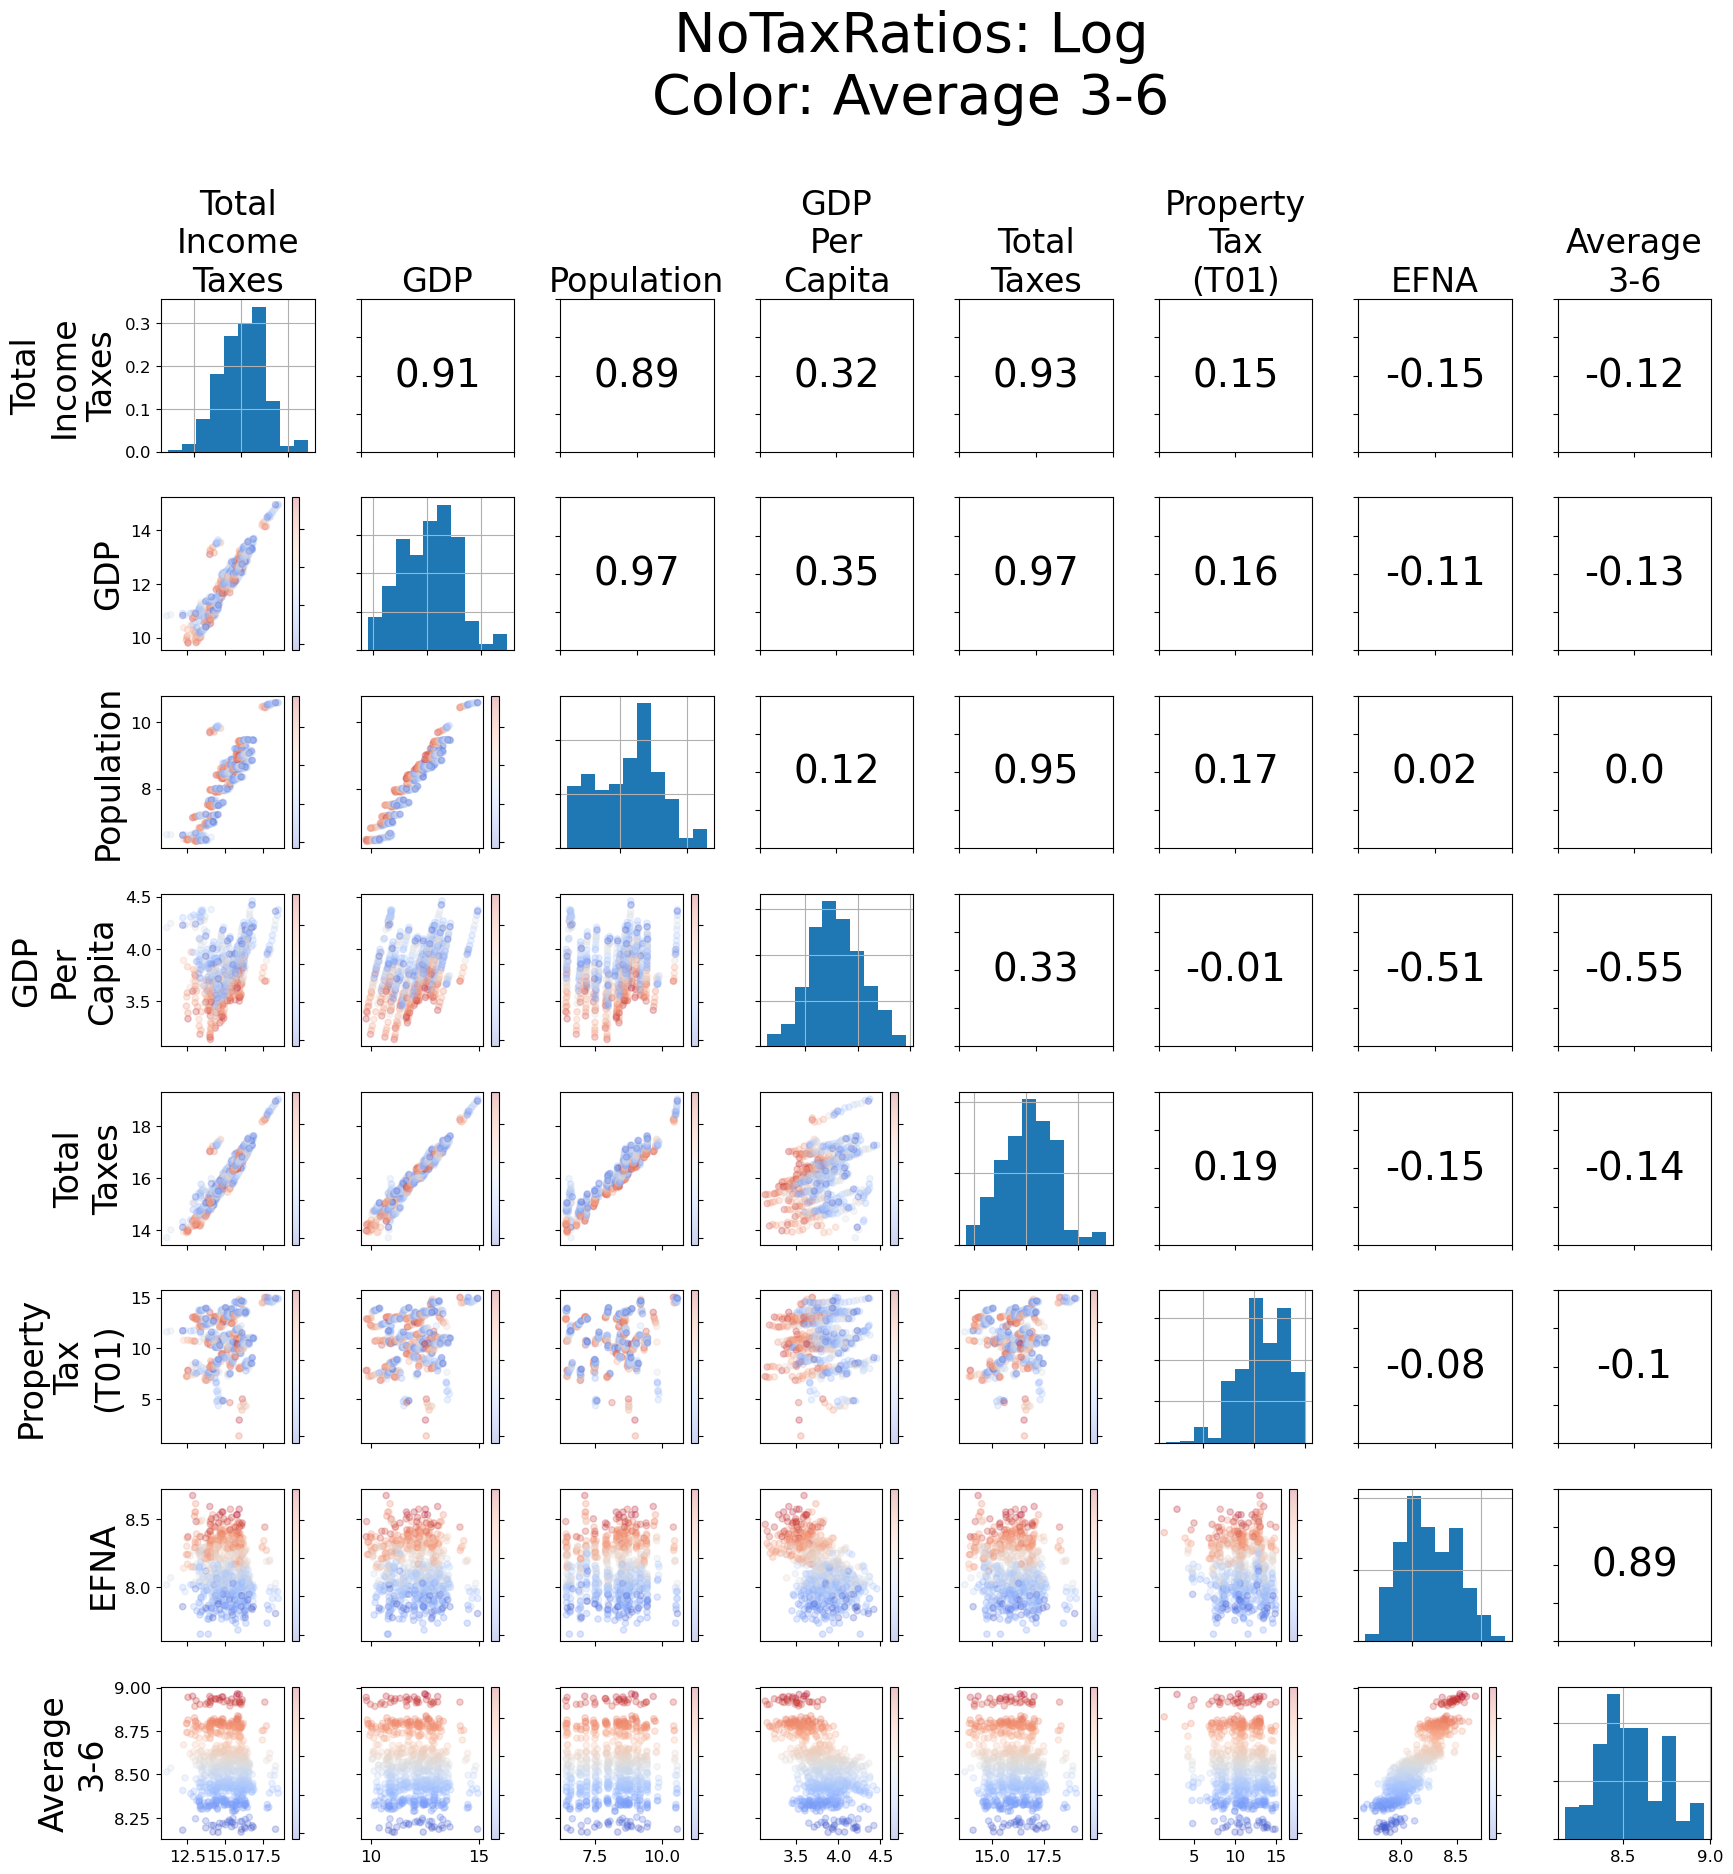

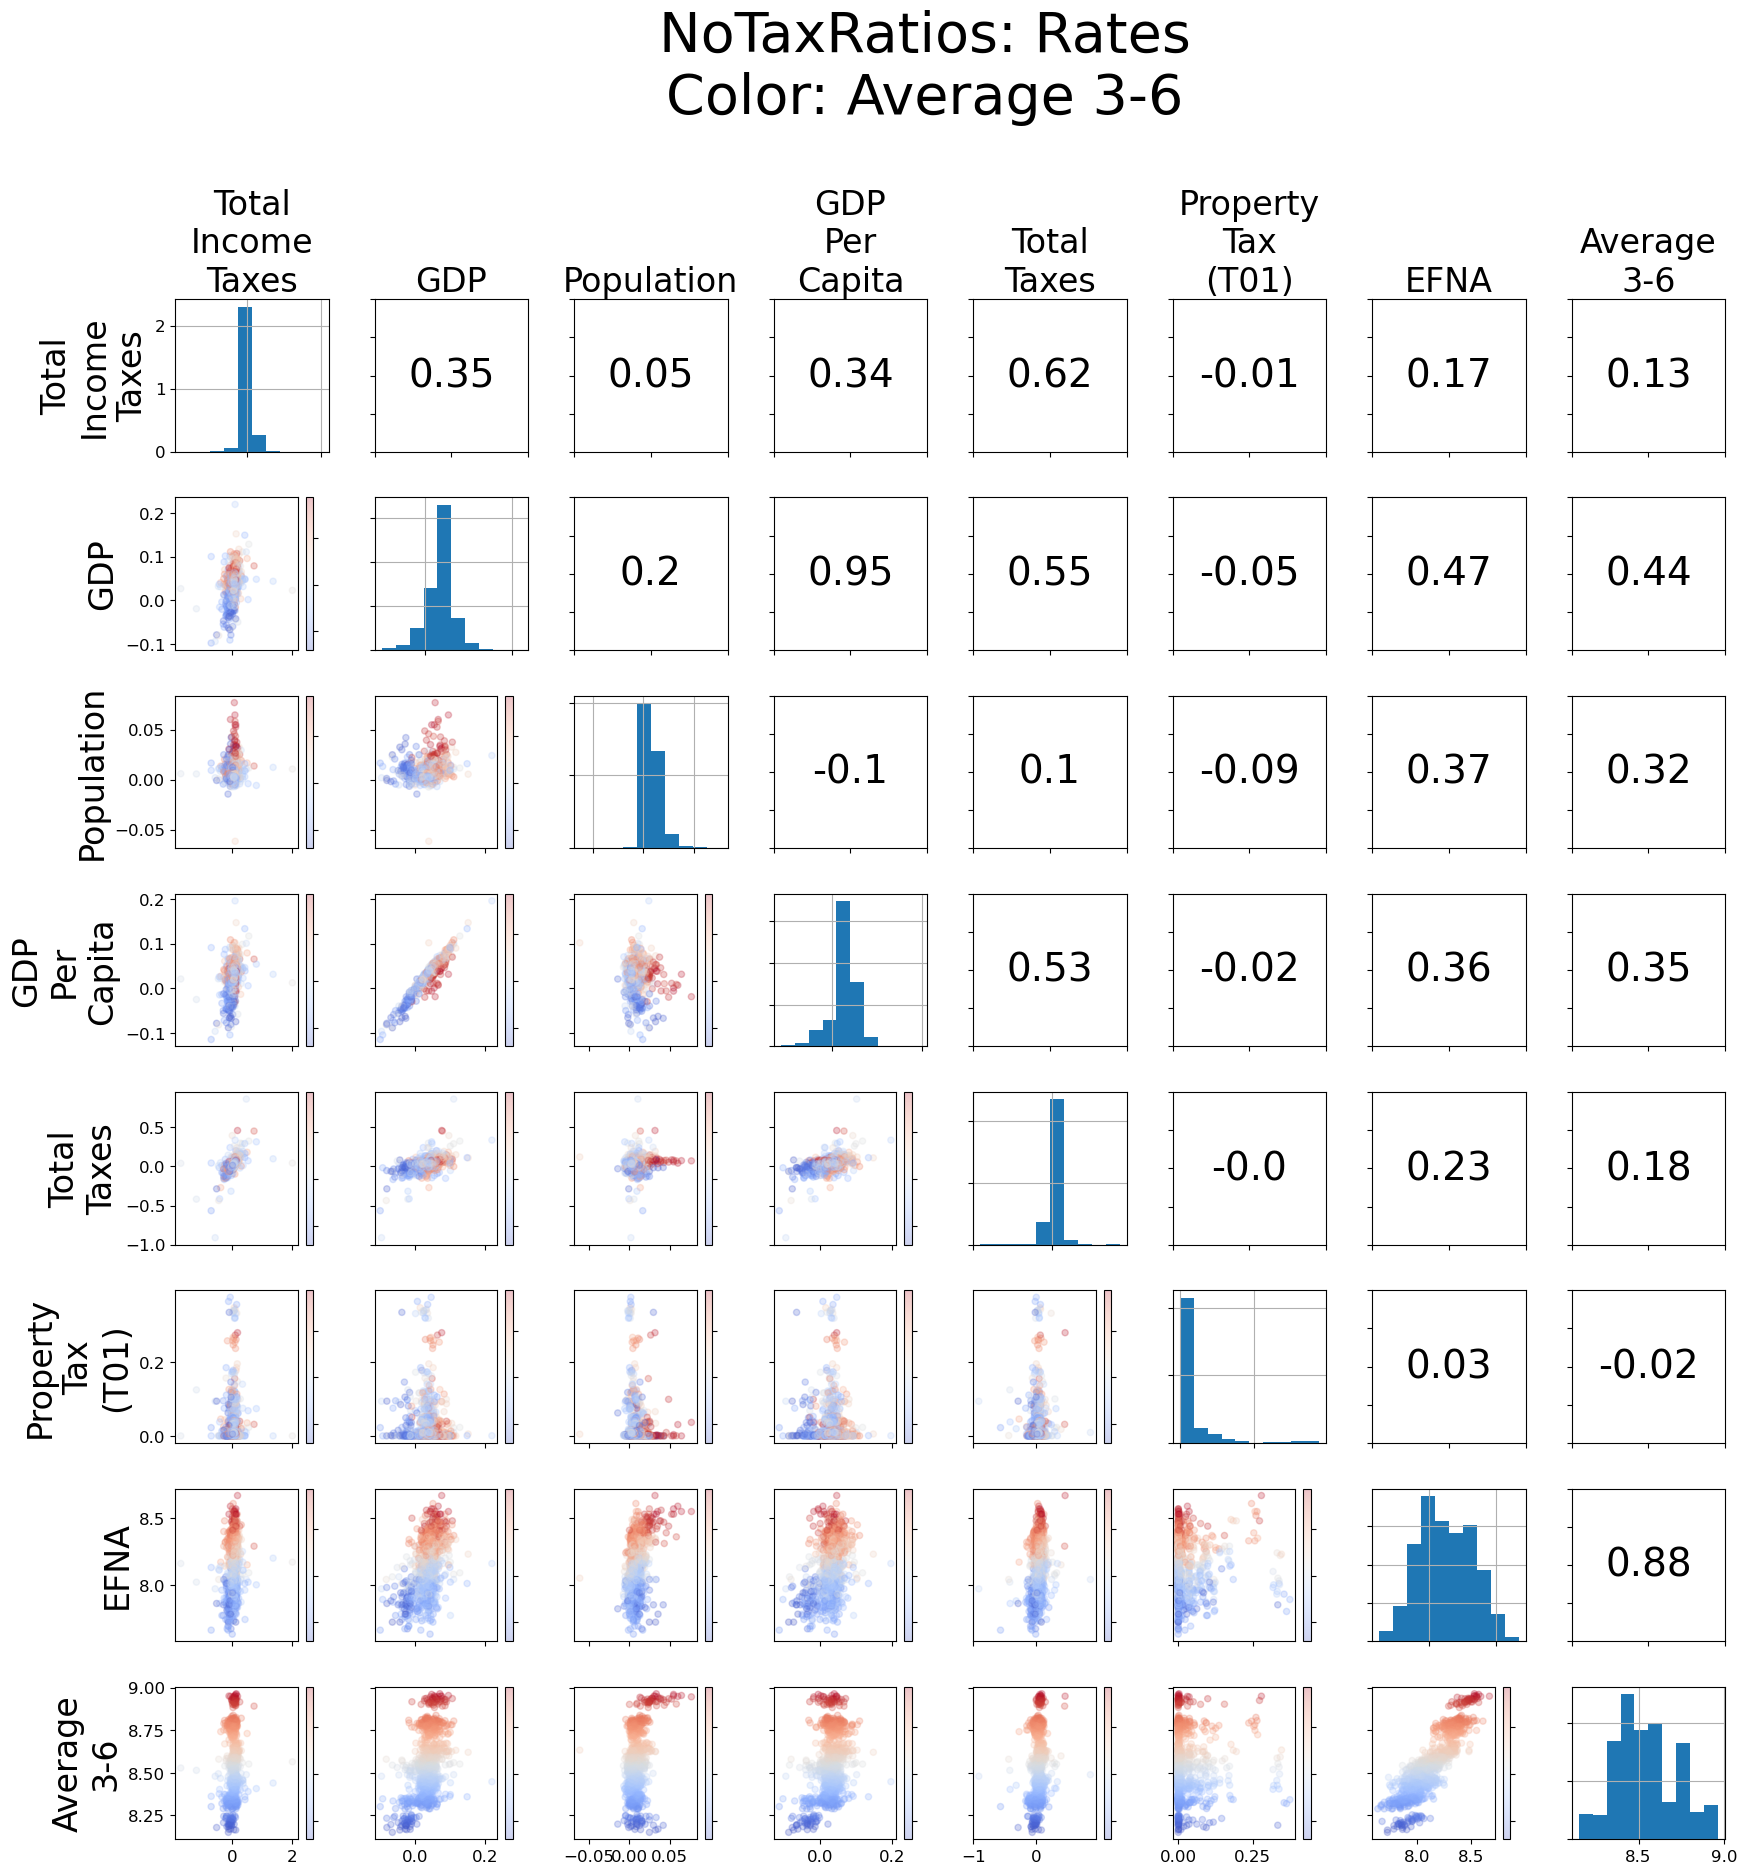

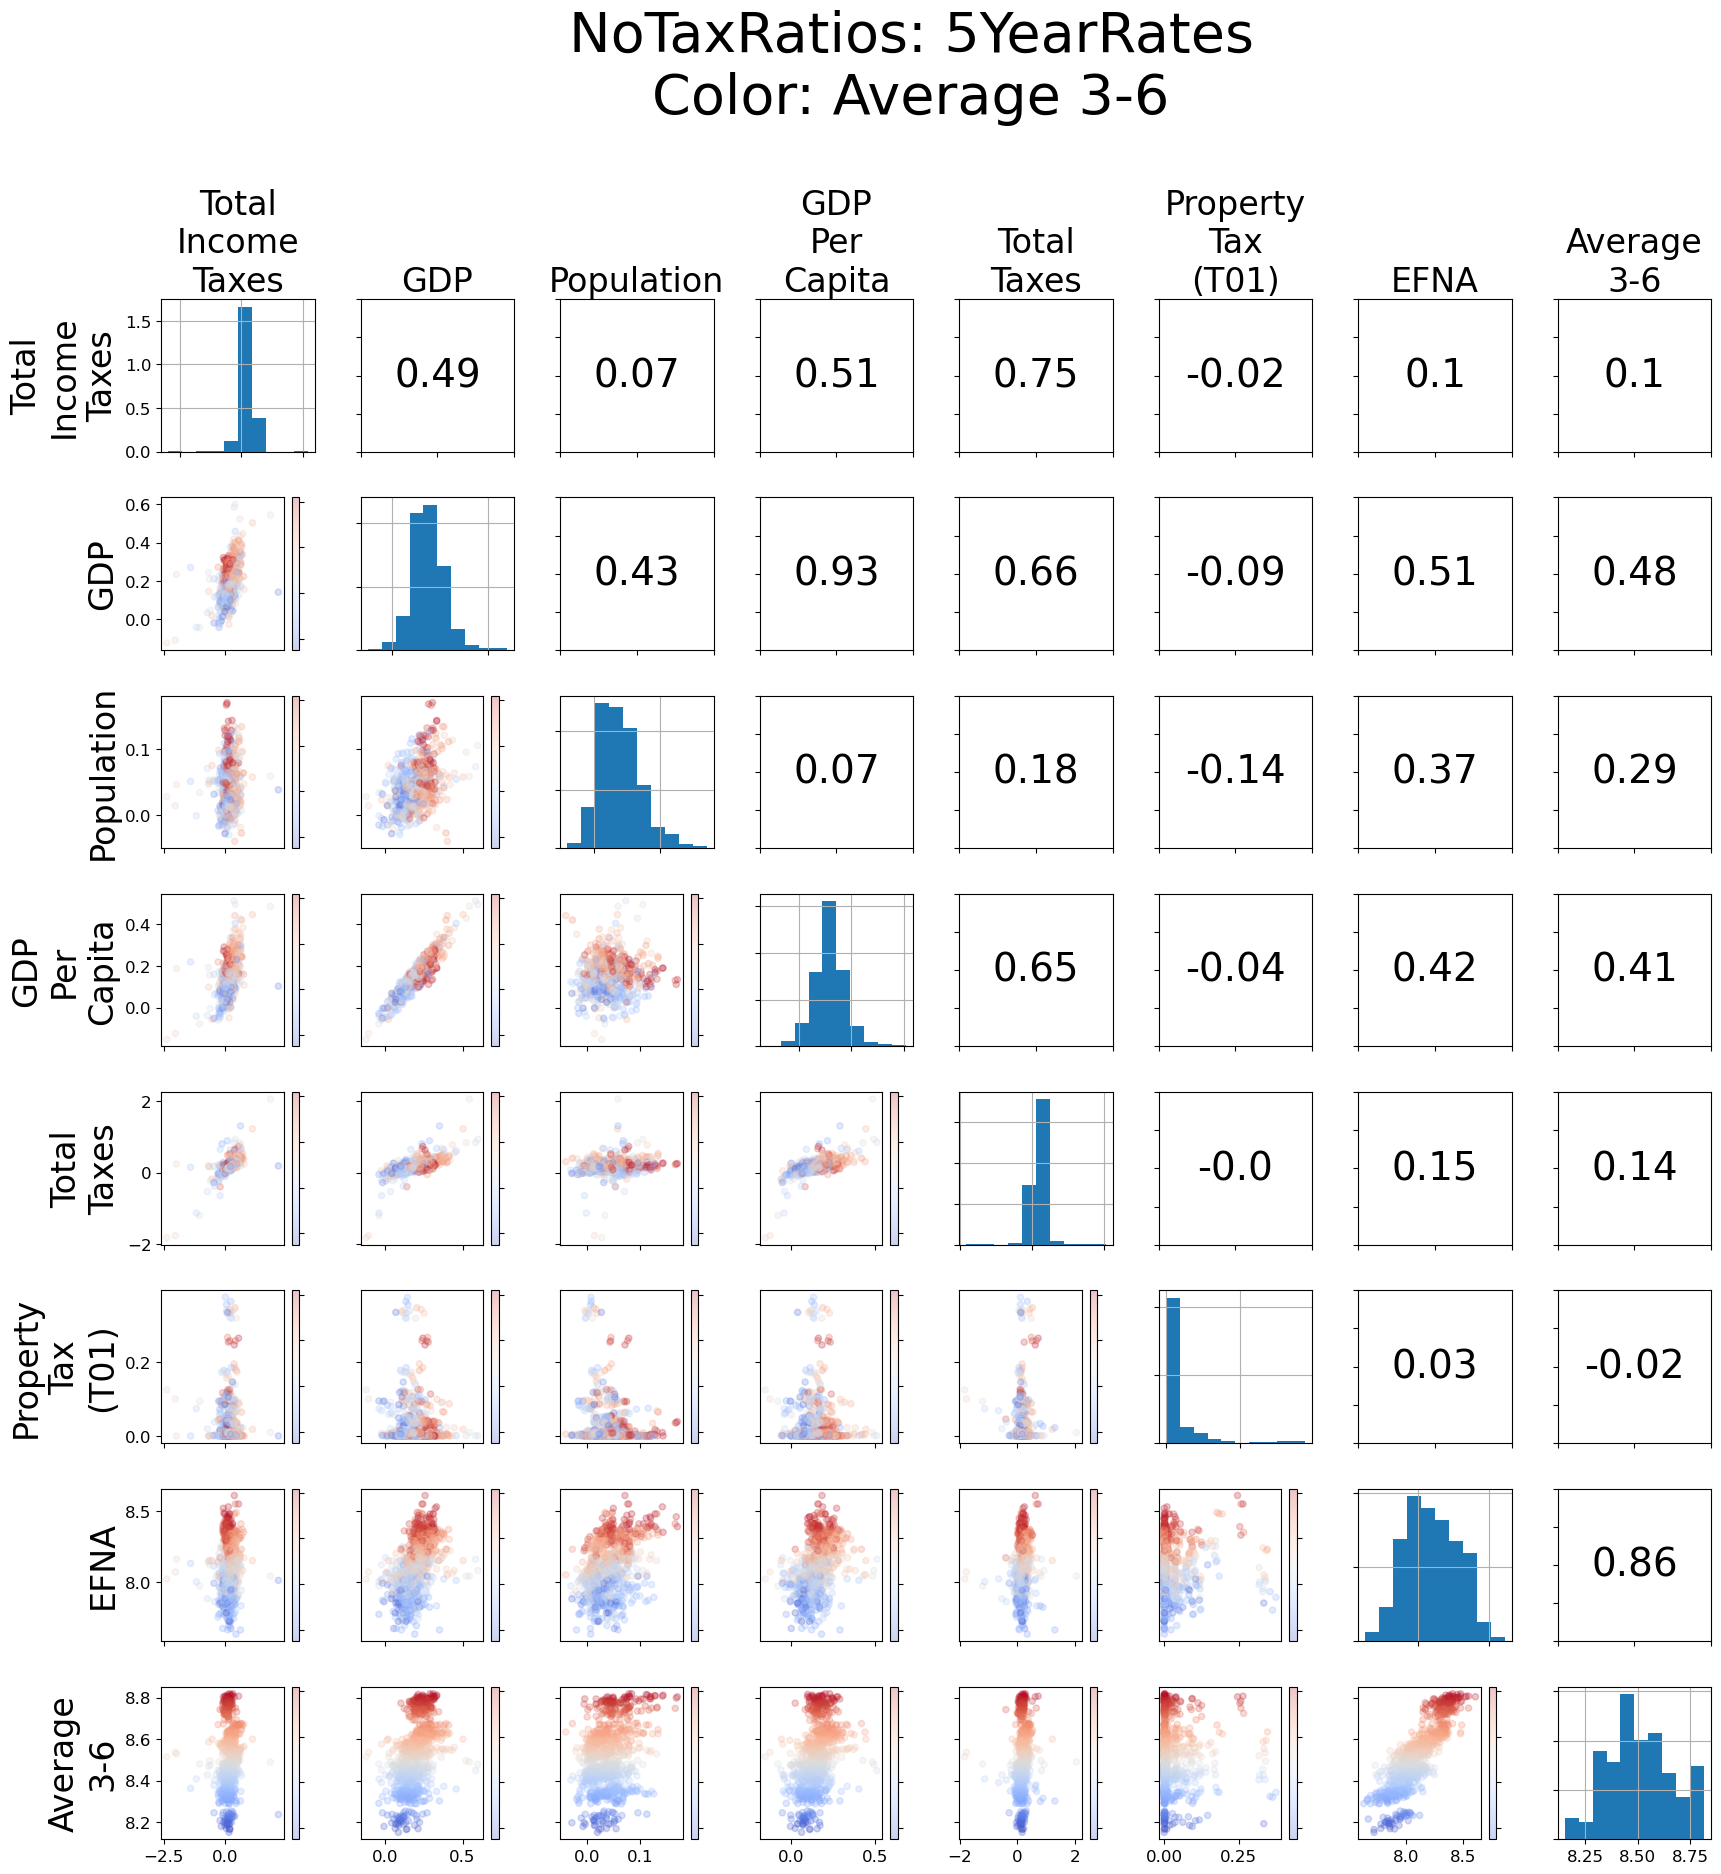

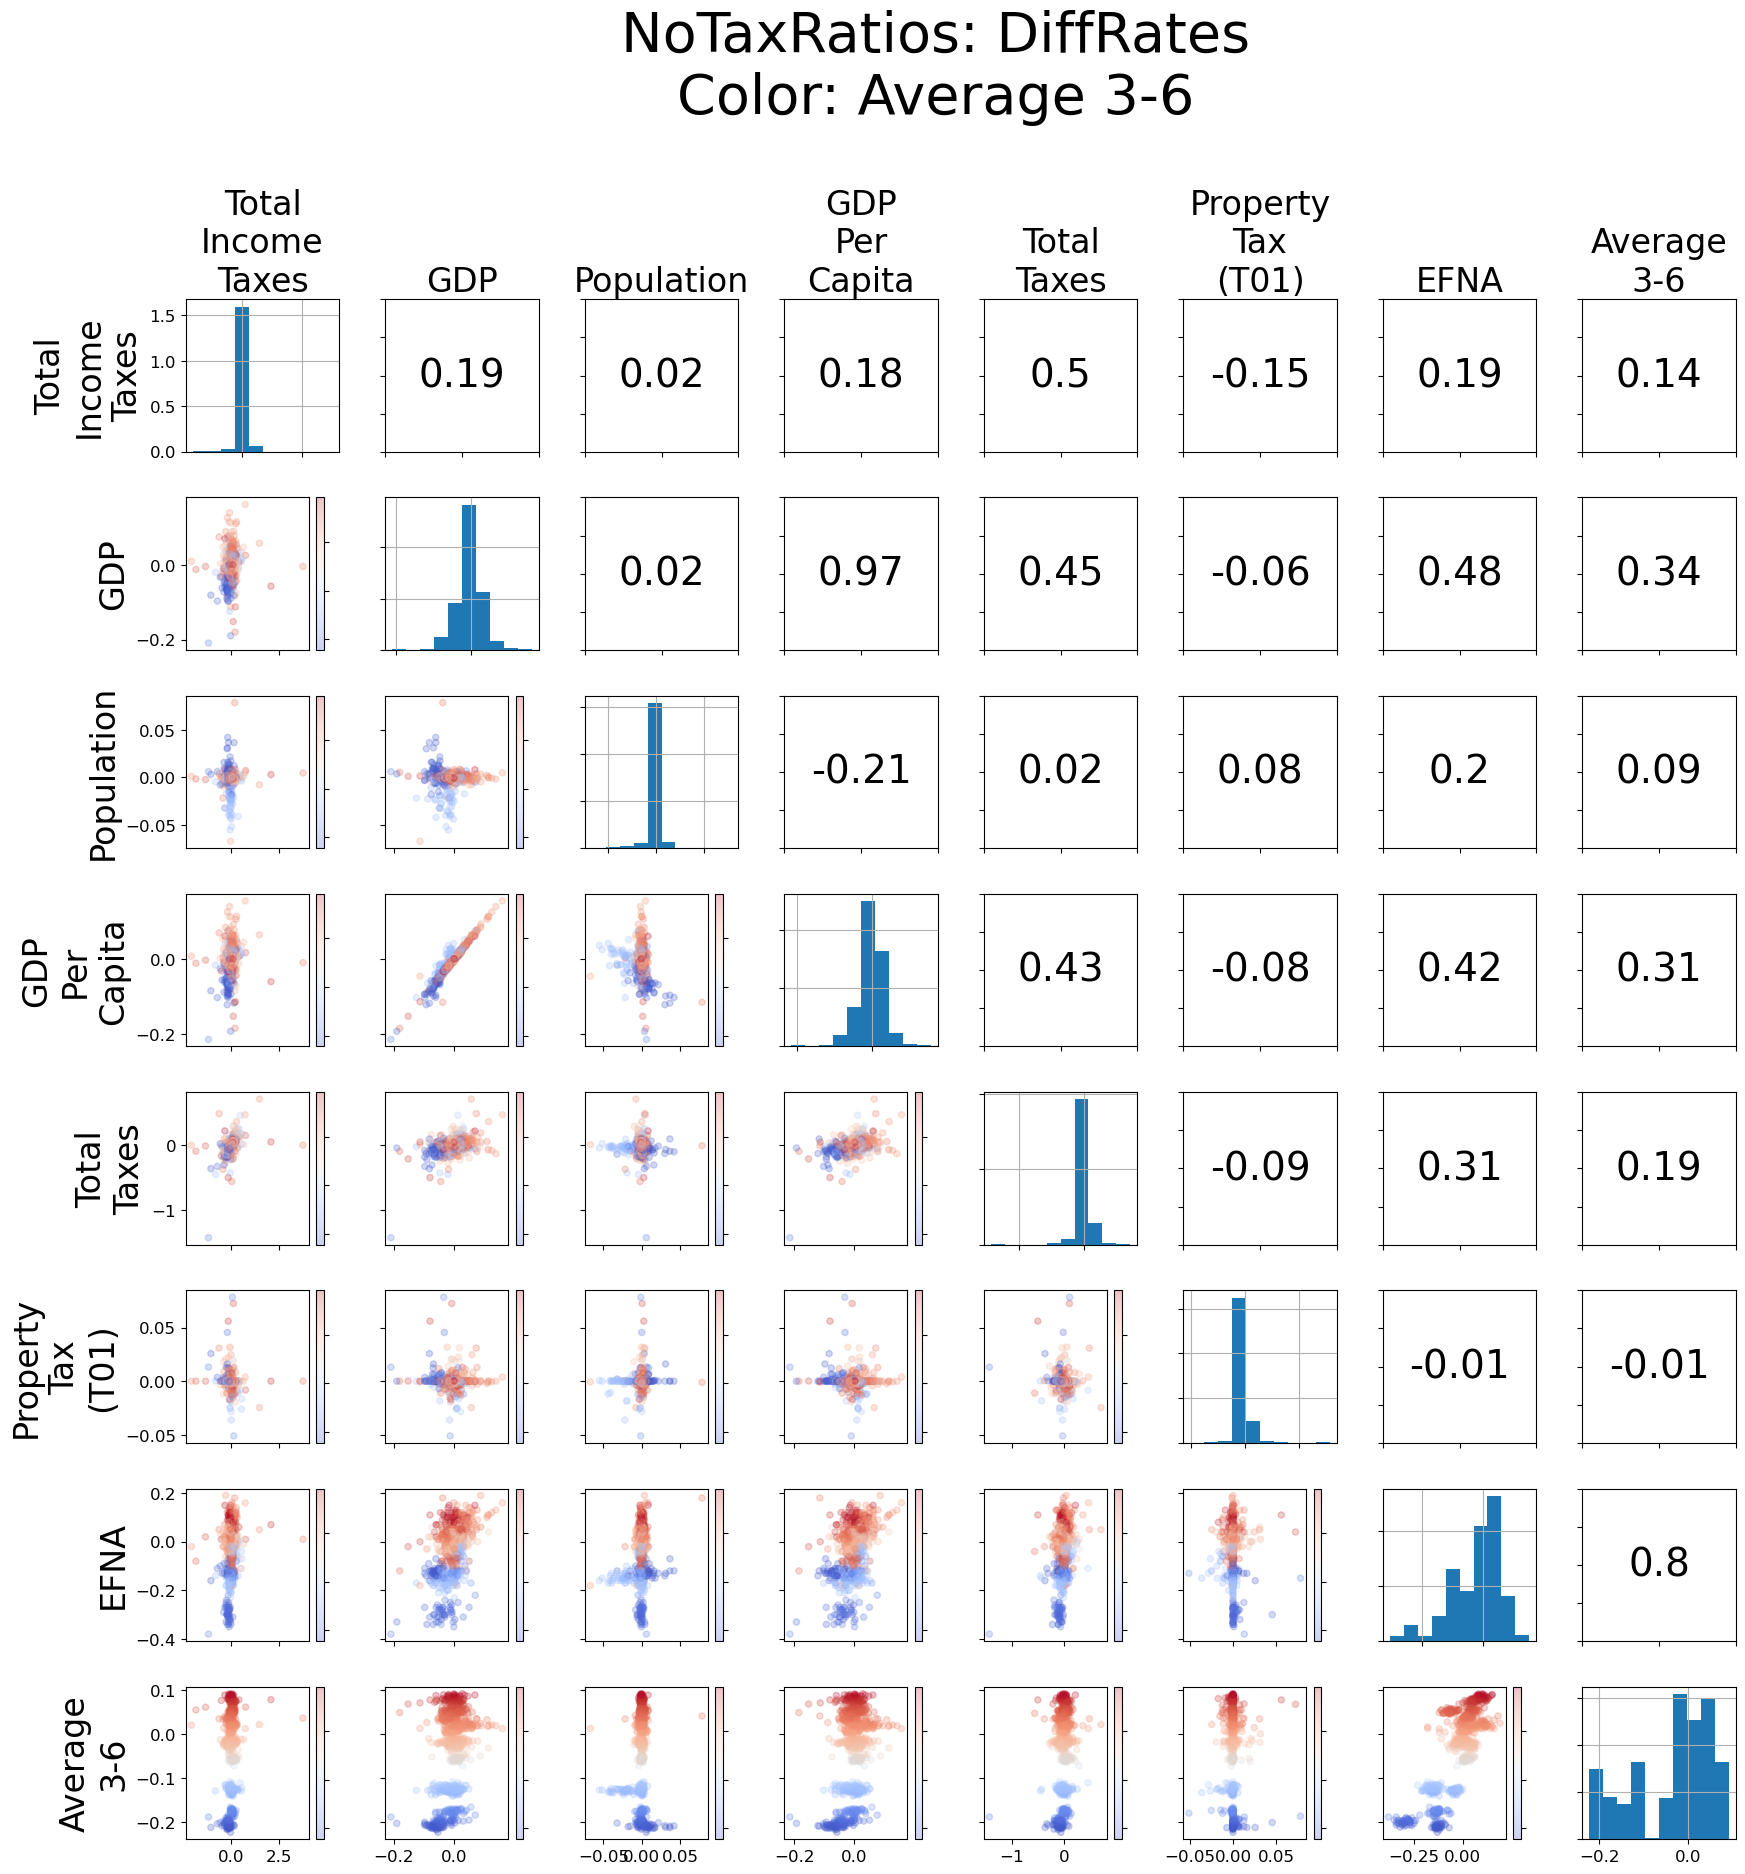

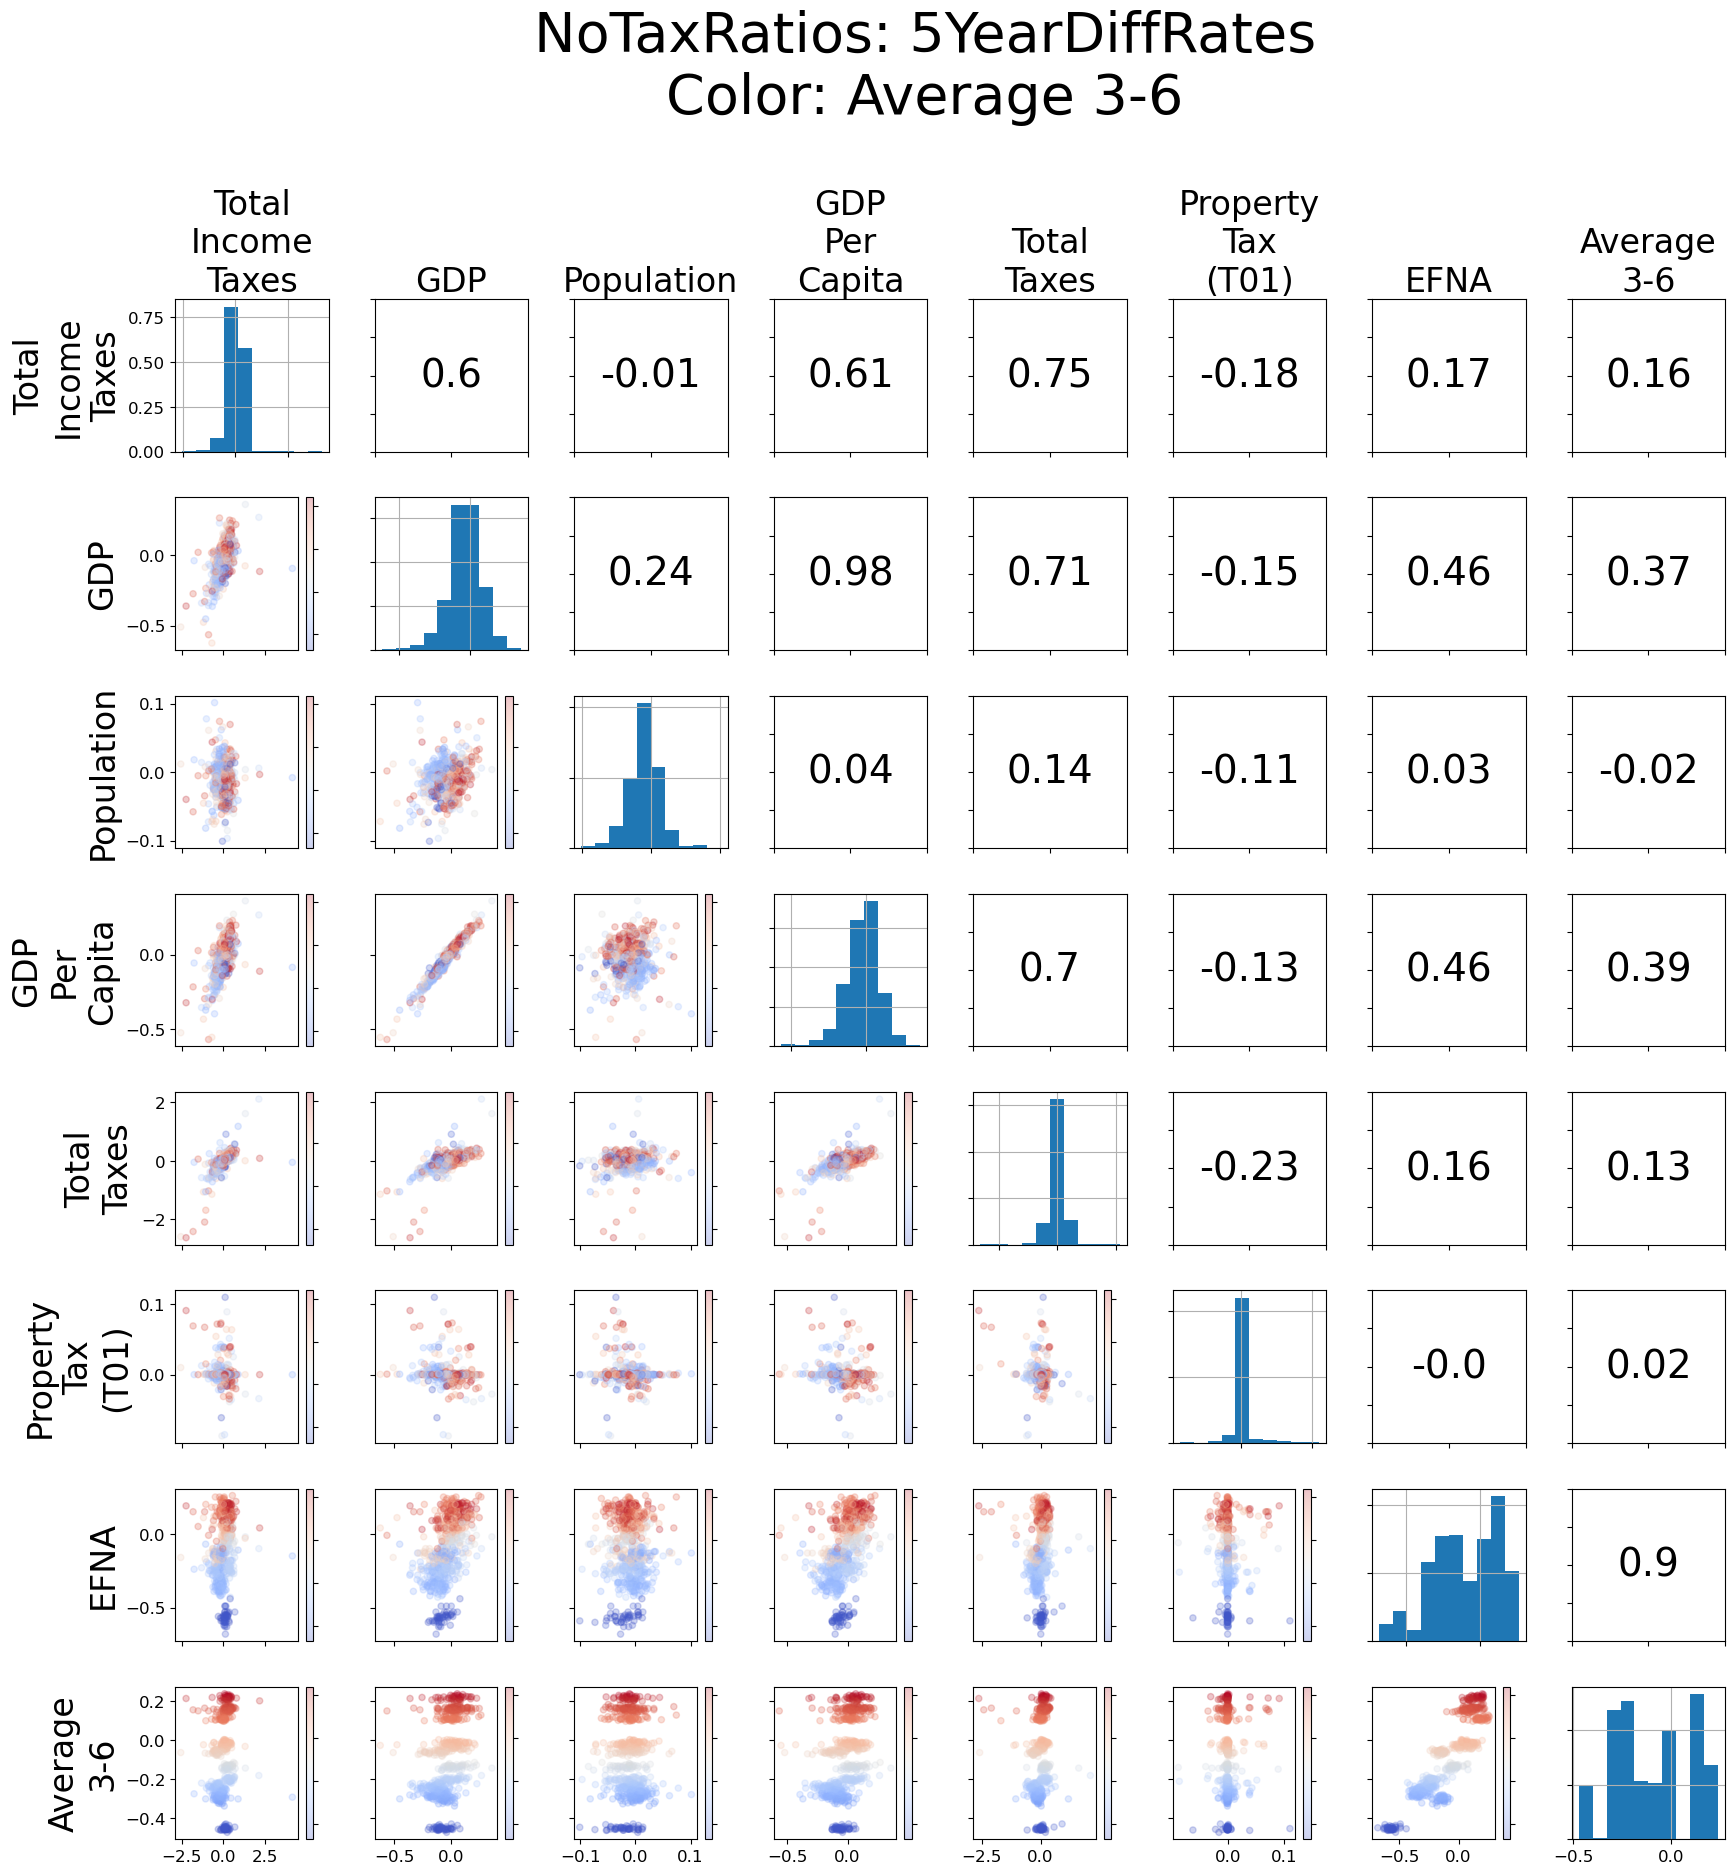

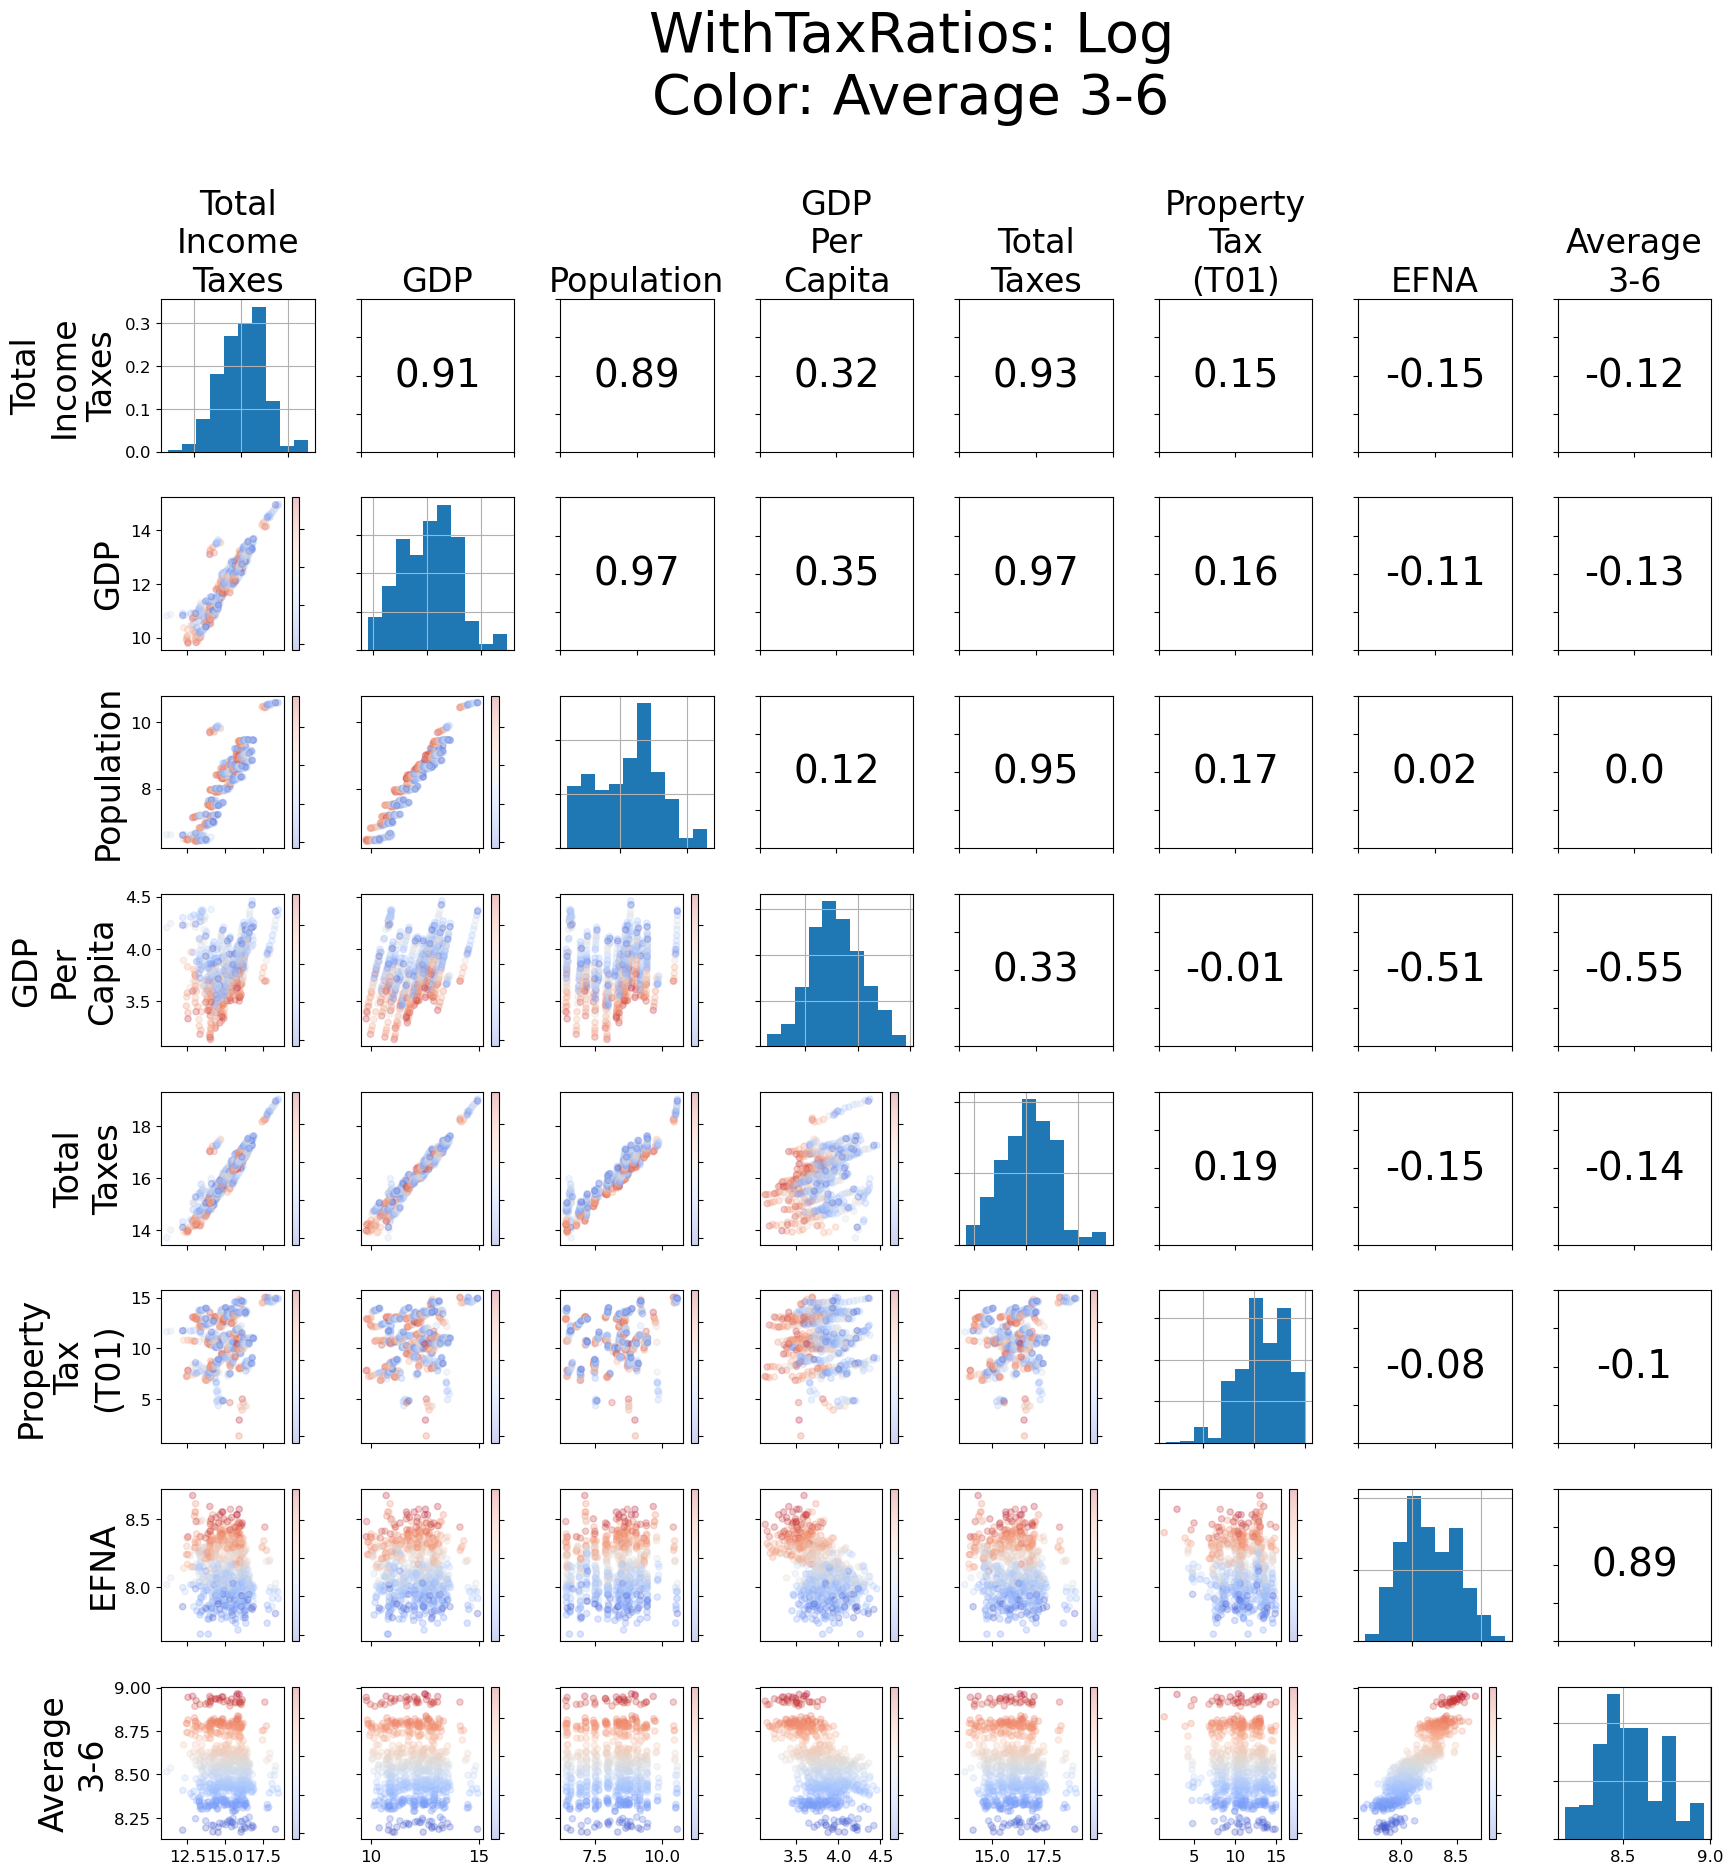

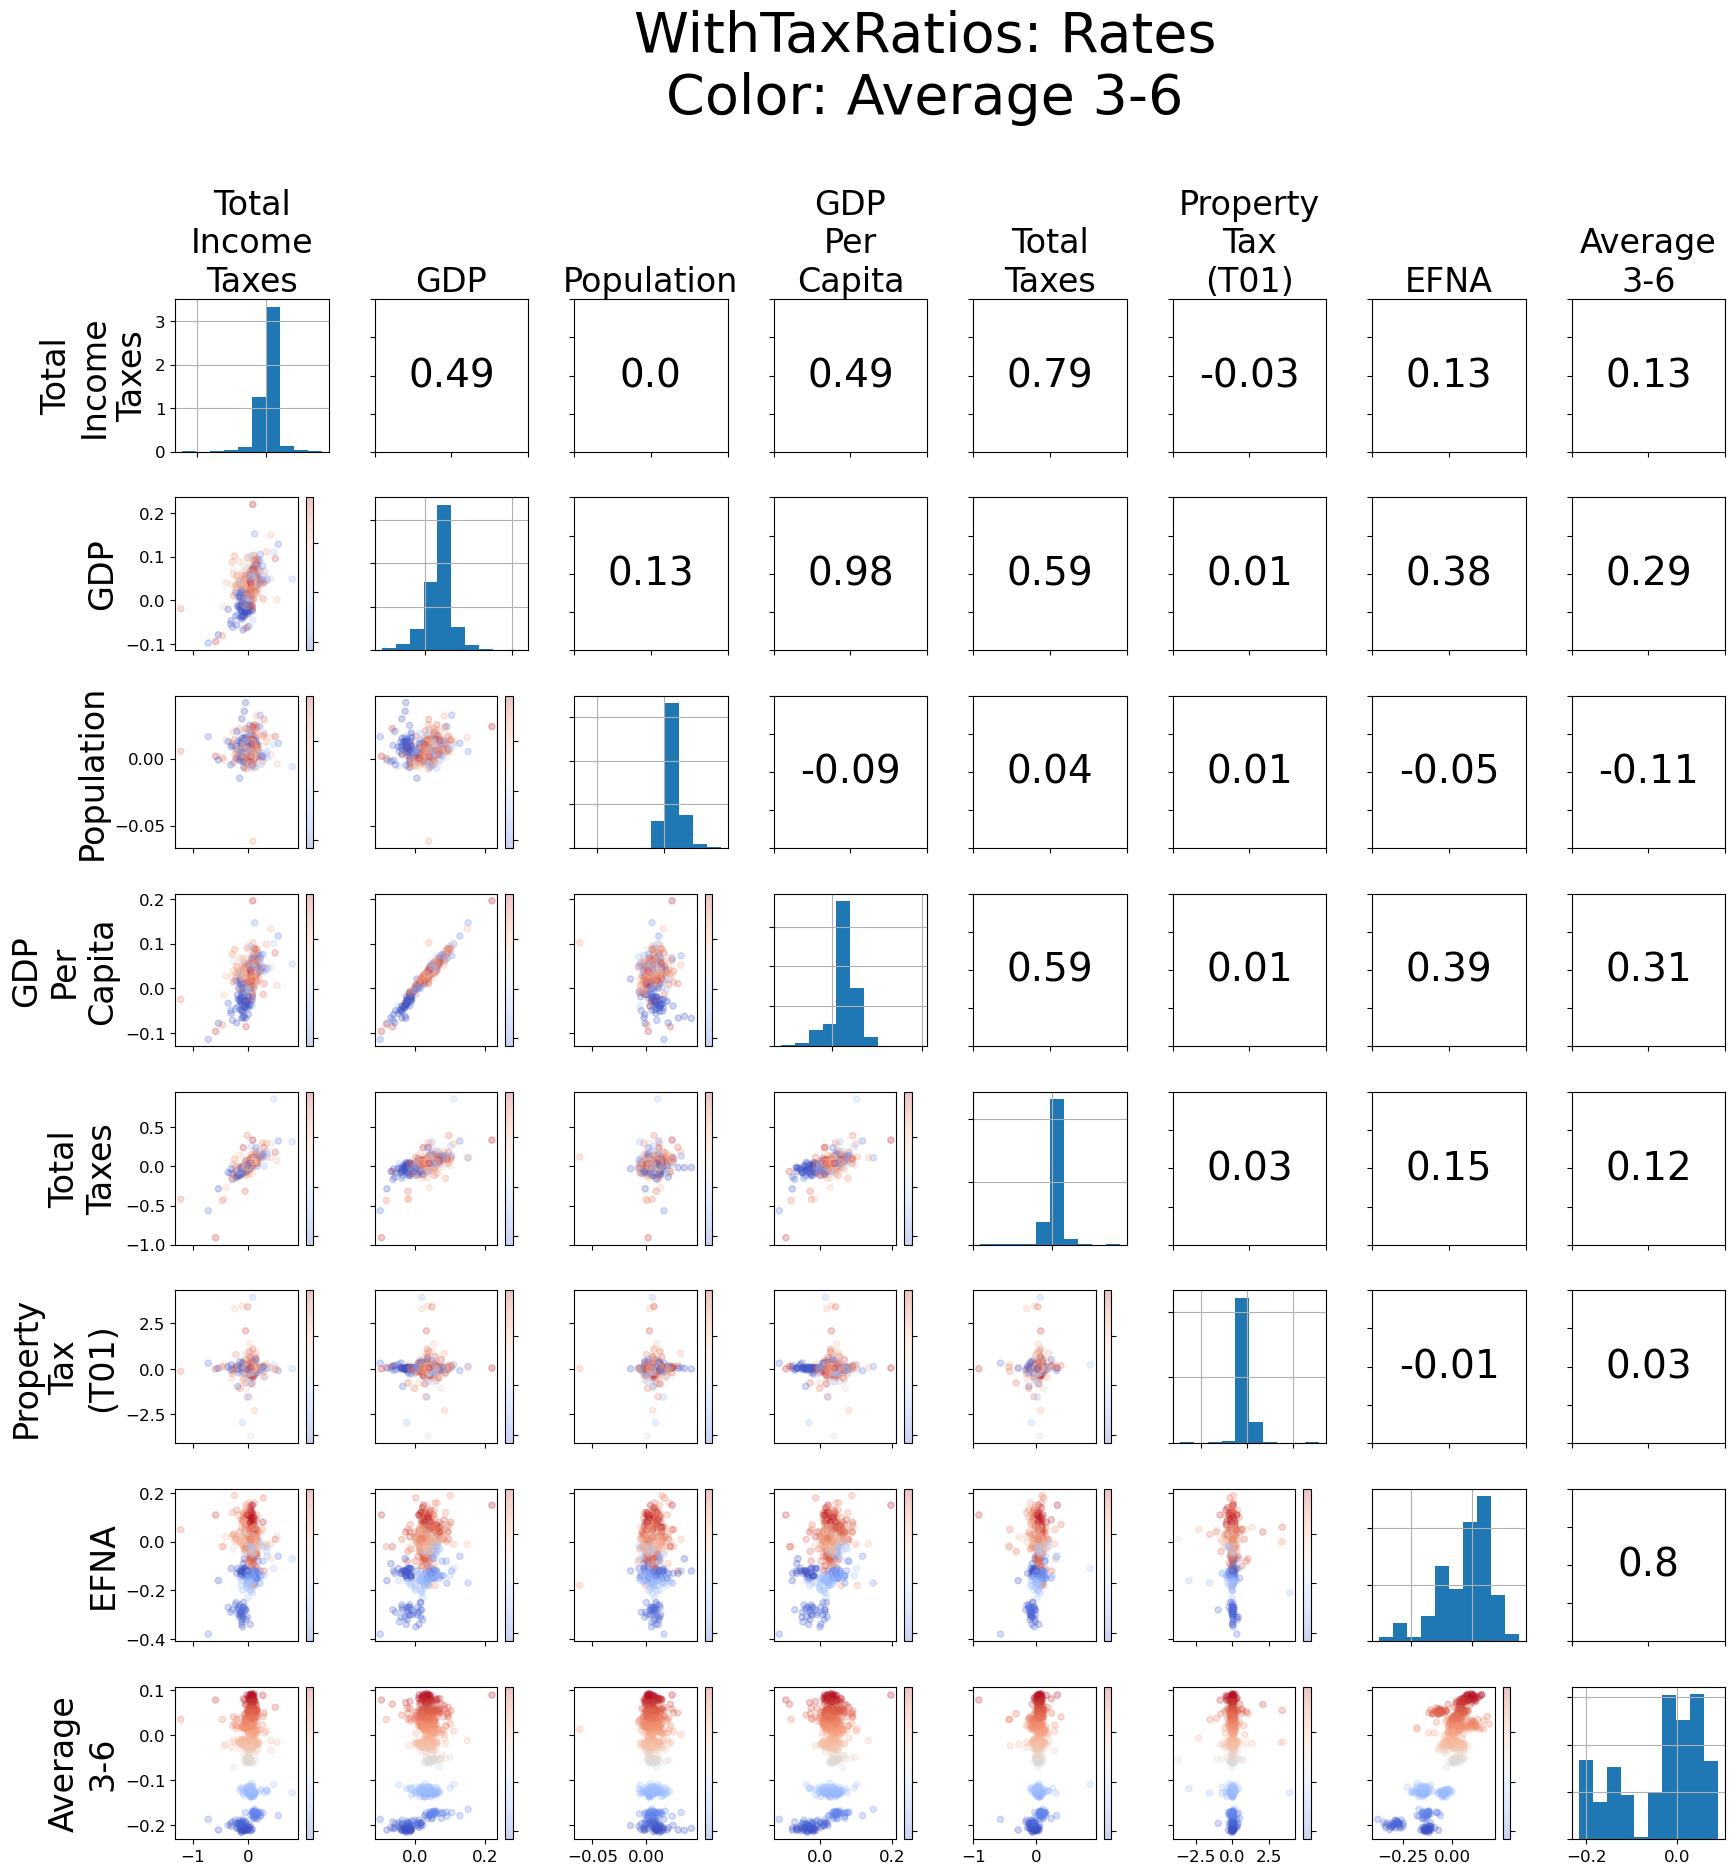

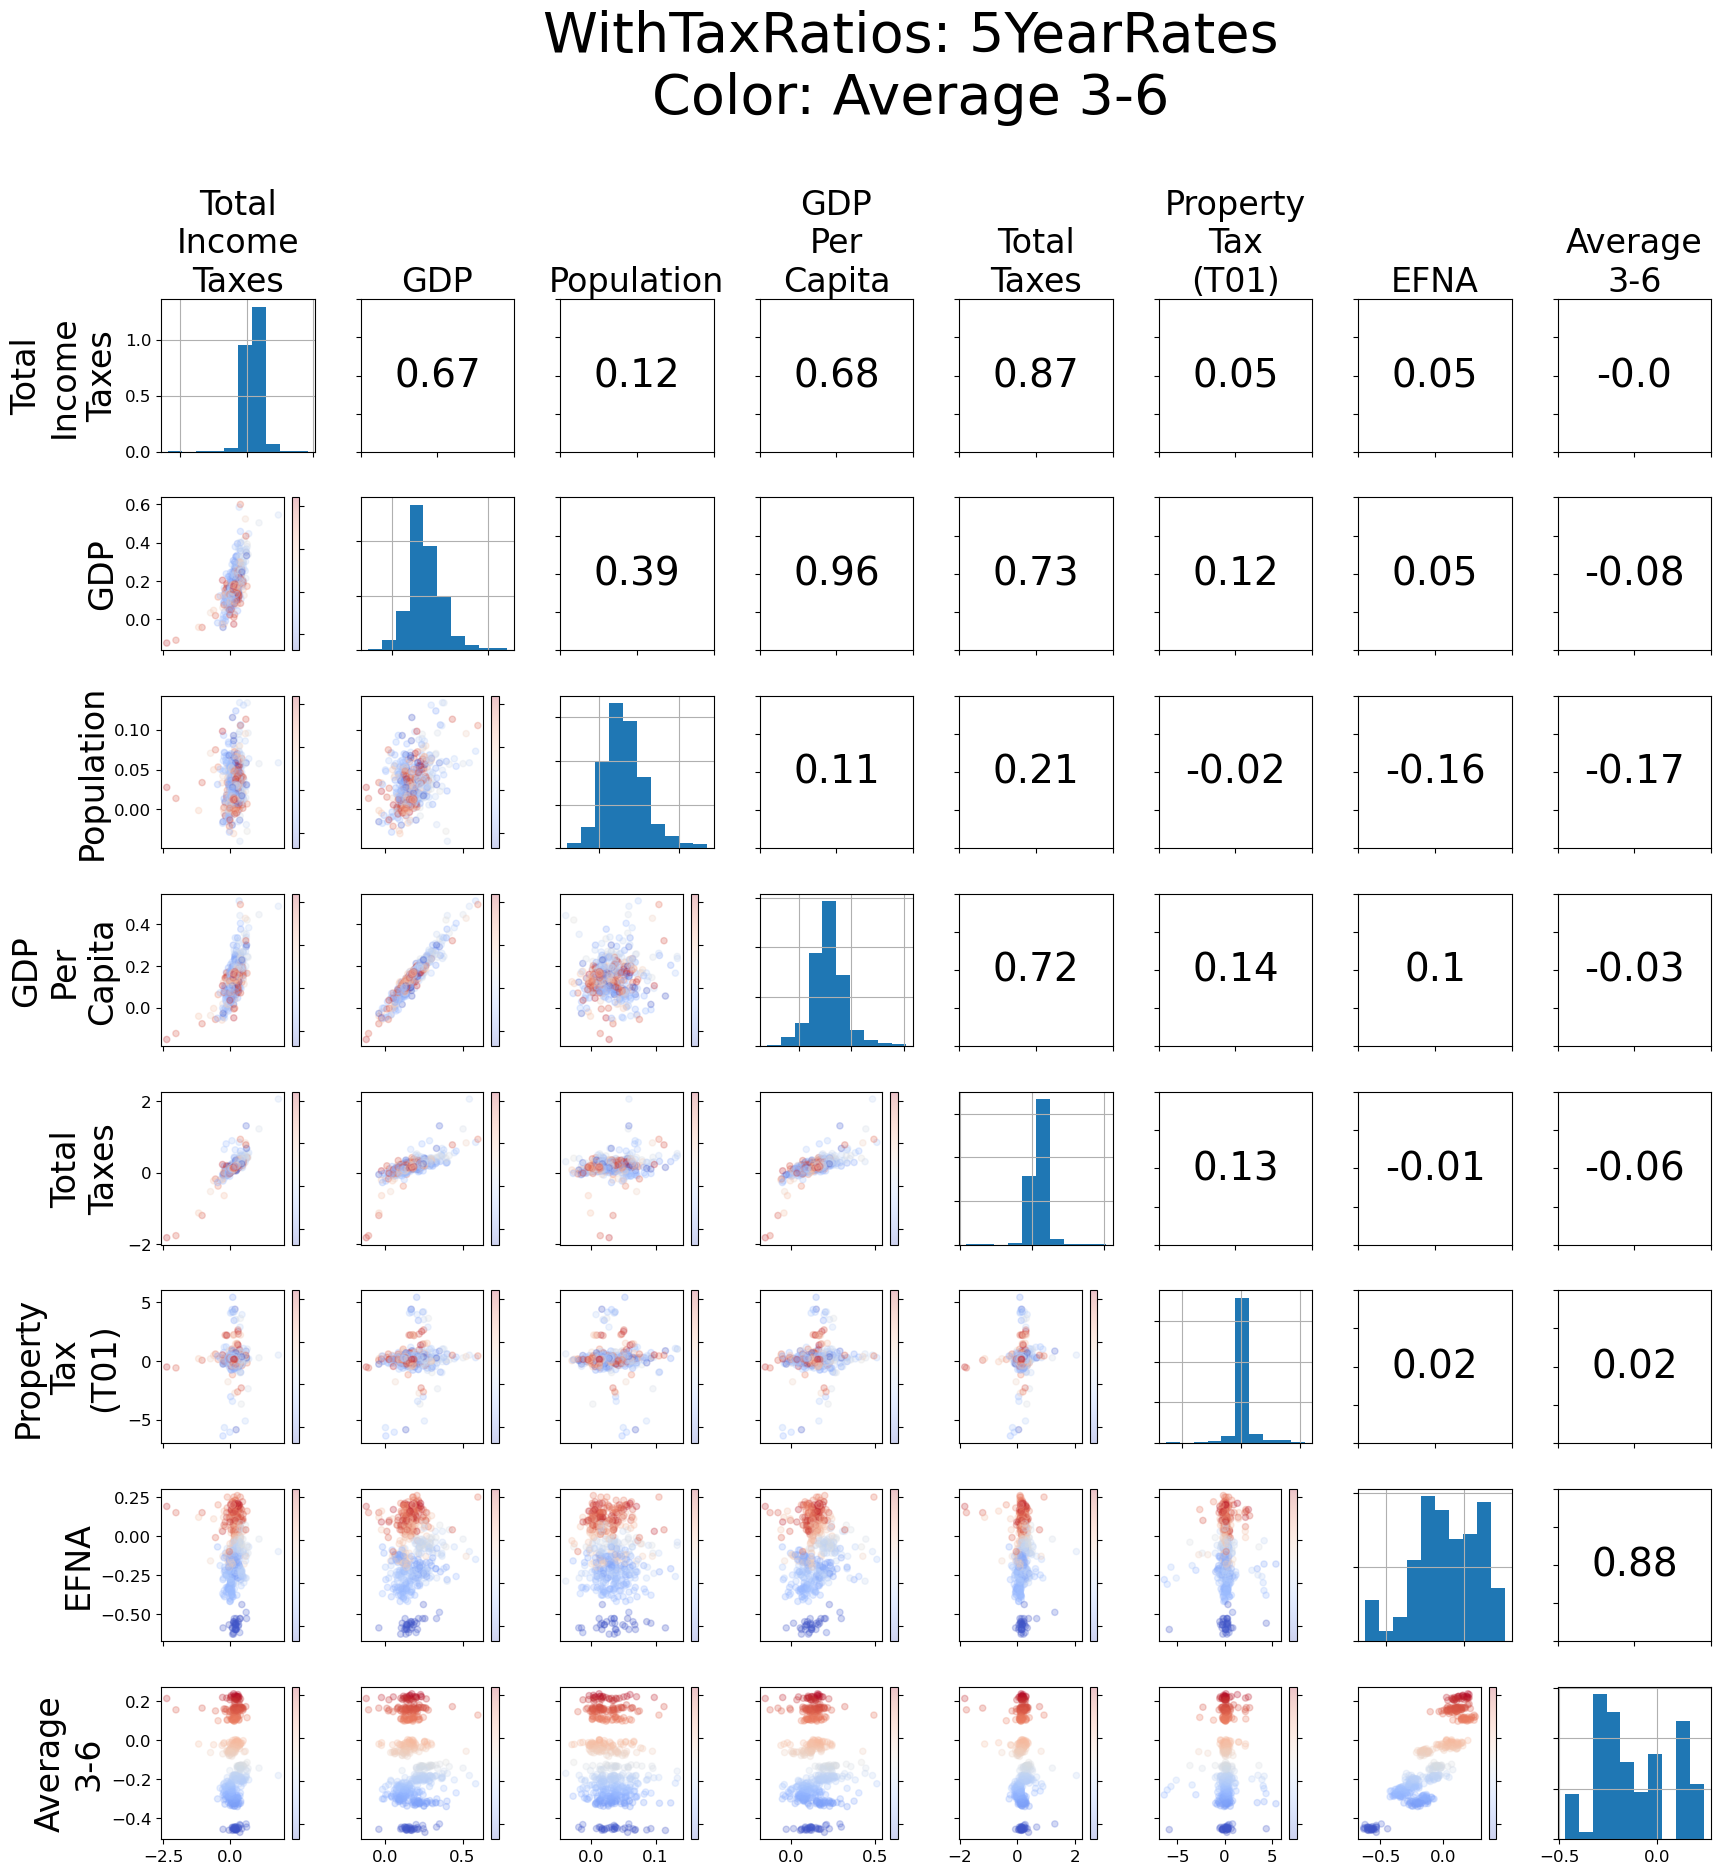

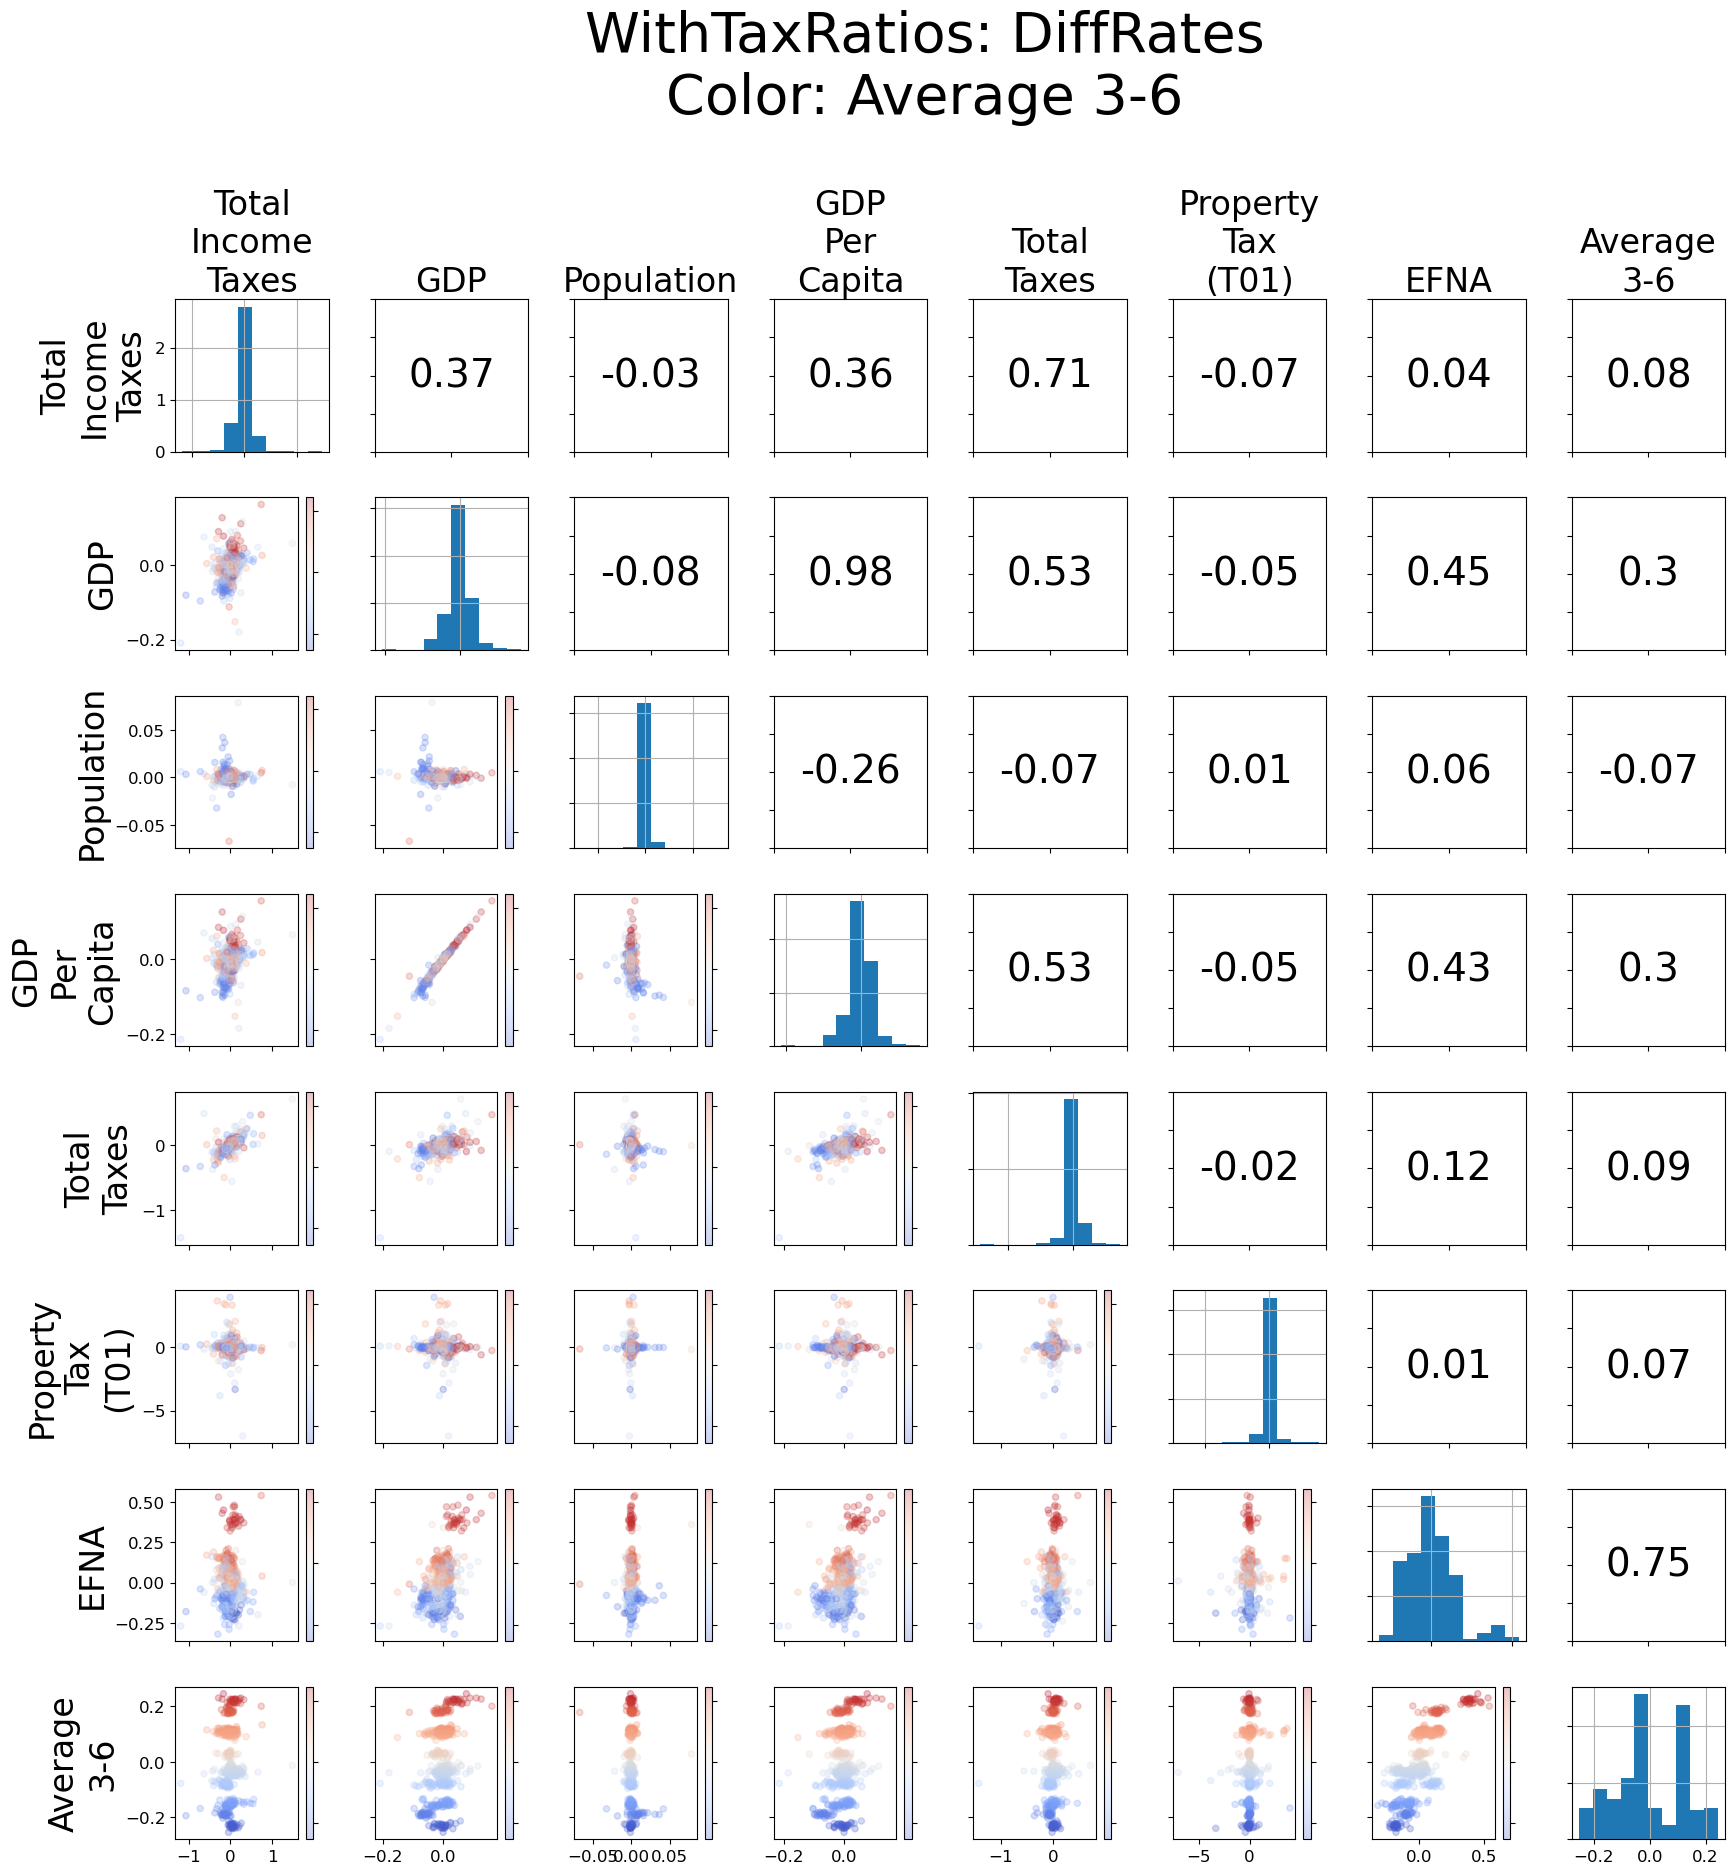

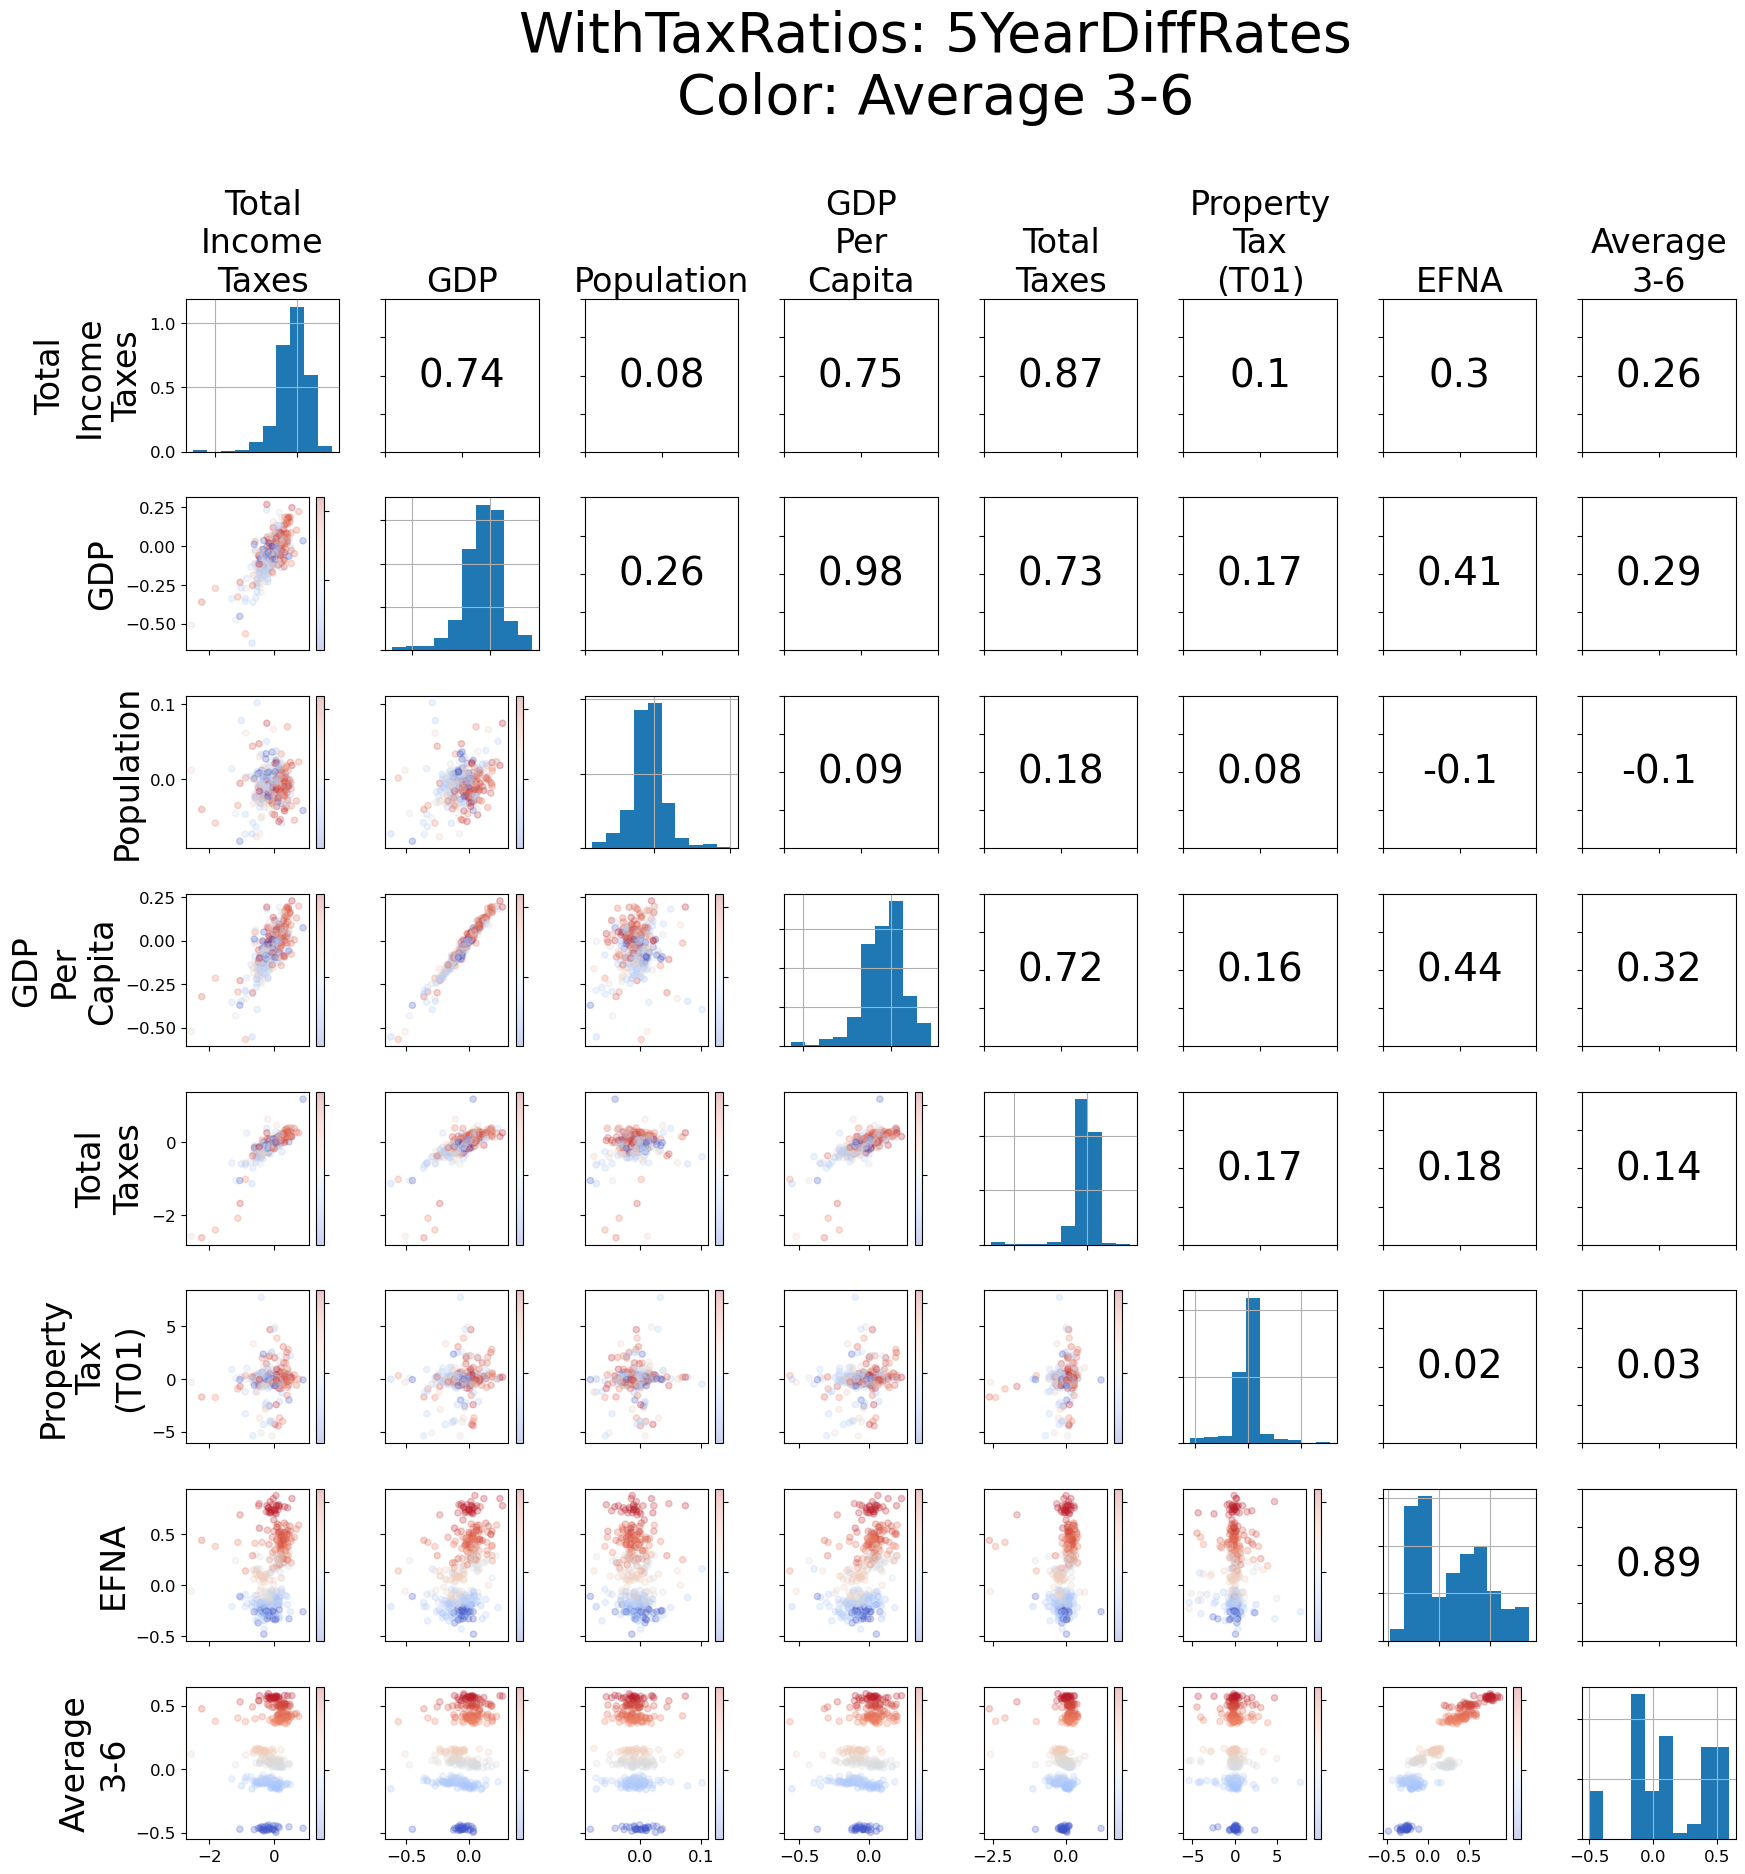

In [2]:
plt.rcParams.update({'font.size': 12})
colors = ["EFNA", "Average 3-6"]
plot_keys = ["Total Income Taxes", "GDP", "Population", "GDP Per Capita",
             "Total Taxes", "Property Tax (T01)", 
         #    "Individual Income Tax (T40)", "Corp Net Income Tax (T41)"
            ] + colors

# Example usage
for variant, dct in list(dfs_dct.items())[:]: 
    for name, df in list(dct.items())[1:]:
    # possible to include tax component levels instead of component by percent of total taxes; 
    #  results of logged components in the least not meaningful without level info
        c ="Average 3-6"
        plot_df = df[plot_keys].dropna()
        fig, ax = plot_scatter_corr(plot_df.dropna(), f"{variant}: {name}\nColor: {c}", corr="corr", alpha =.25, cmap = "coolwarm", c = c)

In [3]:
# plt.rcParams.update({'font.size': 32})
# r2_dict = {}
# results_dict = {}
# beta_dict = {}
# pval_dict = {}

# reg_vars = ["GDP", "Population", "Total Taxes", "Home Price Index",
#             "Average 3-6", "Property Tax (T01)", "State and Local Spending"]
# ic = info_criterion()
# # possible to include tax component levels instead of component by percent of total taxes; 
# #  results of logged components in the least not meaningful without level info
# for variant, dct in list(dfs_dct.items())[:]:
#     for key, df in list(dct.items())[1:]:
#         results_dict[key] = {}
#         r2_dict[key] = {}
#         beta_dict[key] = {}
#         pval_dict[key] = {}
#         # fig, ax = plt.subplots(2,2, figsize = (20,20))
#         for y_name in ["Total Taxes", "GDP", "State and Local Spending", "Property Tax (T01)"]:
#             r2_dict[key][y_name] = {}
#             results_dict[key][y_name] = {}
#             beta_dict[key][y_name] = {}
#             pval_dict[key][y_name] = {}
#             X_names = [name for name in reg_vars if name != y_name]
#             for i, entity in enumerate([False, True]):
#                 for j, time in enumerate([False, True]):
#                     beta_dict[key][y_name] = {}
#                     pval_dict[key][y_name] = {}
#                     reg_data = df[reg_vars].dropna()
#                     Y = reg_data[[y_name]]
#                     X = reg_data[X_names]
#                     if "Diff" not in key:
#                         X["Constant"] = 1
#                     n = reg_data.shape[1]
#                     k = len(X)
#                     # call panel_regression method
#                     model = PanelOLS(Y,X, entity_effects=entity, time_effects=time)
#                     # print(f"Data: {key} y={y_name}\n Entity: {entity}\nTime: {time}")
#                     results_dict[key][y_name][f"Entity:{entity},\nTime:{time}"]  = model.fit(cov_type='clustered', cluster_entity=True)
#                     results = results_dict[key][y_name][f"Entity:{entity},\nTime:{time}"]
#                     r2_dict[key][y_name][f"Entity:{entity},\nTime:{time}"] = {}
#                     r2s = ('rsquared', 'rsquared_between', 'rsquared_within')
#                     for r2 in r2s:
#                         r2_dict[key][y_name][f"Entity:{entity},\nTime:{time}"][r2] = getattr(results, r2)
#                     # print(results)
#             print(f"{variant}: {key}\n",y_name)
#             compare_regs = compare(results_dict[key][y_name])
#             print(compare_regs)
#             compfig, compax = compare_regs_plot(compare_regs, y_name, variant = variant, title = f"y = {y_name}\n{key}")
#             compfig.savefig(f"outputs/{y_name}{variant}Params.png", bbox_inches = "tight")
#         # for r2 in r2s:
#         #     print(r2df)
#         #     r2_index = r2df.loc[r2] >0
    
#         #     r2df = r2df[r2df.loc[r2] >0]
#         # Convert the dictionary to a list of tuples
#         data_tuples = [(outer_key, inner_key, k, v) for outer_key, inner_dict in r2_dict[key].items() for inner_key, inner_inner_dict in inner_dict.items() for k, v in inner_inner_dict.items()]
        
#         # Convert the list of tuples to a pandas DataFrame
#         r2_df = pd.DataFrame(data_tuples, columns=[ 'y', 'Effects', 'r2',  'Value']).sort_values(["r2", "y"])
        
#         # Set the multi-level index
#         r2_df = r2_df.pivot(index = ["r2", "y"], columns = "Effects", values = "Value").reset_index()
#         r2fig, r2ax = plot_r2(r2_df, r2s, key,variant)
#         r2fig.savefig(f"outputs/{y_name}{variant}R2s.png", bbox_inches = "tight")

In [4]:
import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.io as pio
from linearmodels import PanelOLS
from linearmodels.panel import compare
from homebrewedFunctions.functions import *

# Define plotting functions using Plotly
def plot_scatter_corr(data, x, y, title):
    fig = px.scatter(data, x=x, y=y, trendline='ols', opacity=0.25, color_continuous_scale='coolwarm')
    fig.update_layout(title=title)
    return fig

def plot_r2(data, title):
    r2_names = ["rsquared", "rsquared_within", "rsquared_between"]
    rows = len(r2_names)
    colors = {}
    fig = make_subplots(rows=rows, cols=1)#, subplot_titles=r2_names)   

    for i, key in enumerate(data["y"].unique()):
        colors[key] = f'rgba({i*30 % 256}, {i*60 % 256}, {i*90 % 256}, 0.8)'
    for j, r2 in enumerate(r2_names):
        row = j+1
        df = data[data["r2"]==r2]
        showlegend = True if row == 1 else False 
        for i, yname in enumerate(df["y"]):
            print(df.iloc[i])            
            fig.add_trace(go.Bar(name=yname, x=df.keys()[2:], y=df.iloc[i].iloc[2:],
                          marker_color=colors[yname], legendgroup = yname, 
                          showlegend = showlegend), row=row, col=1)     
            fig.update_yaxes(title_text = r2_names[j], row = row, col = 1)
               
    fig.update_layout(barmode='group', 
                      hovermode="x",
                      title=title, 
                      showlegend=True)
    return fig

def compare_regs_plot(compare_regs, plot_params, title):
    rows = len(plot_params.keys())
    fig = make_subplots(rows=rows, cols=1)#, subplot_titles=list(plot_params.values()))

    # Define colors for the bars
    colors = {}
    for i, key in enumerate(compare_regs.params.index):
        colors[key] = f'rgba({i*30 % 256}, {i*60 % 256}, {i*90 % 256}, 0.8)'

    for key in compare_regs.params.index:
        for i, (param_method, param_name) in enumerate(plot_params.items()):
            row = i+1
            showlegend = True if row == 1 else False 
            fig.add_trace(go.Bar(name=key, x=compare_regs.params.columns, y=getattr(compare_regs, param_method).round(3).loc[key],
                                 marker_color=colors[key], legendgroup = key, showlegend = showlegend), row=row, col=1)
            fig.update_yaxes(title_text = list(plot_params.values())[i], row = row, col = 1)


    fig.update_layout(barmode='group', 
                      hovermode="x",
                      title=title, 
                      showlegend=True)

    return fig

# Extract variables and models from the existing script context
dependent_variables = ["Total Taxes", "GDP", "State and Local Spending", "Property Tax (T01)"]
reg_vars = ["GDP", "Population", "Total Taxes", "Home Price Index", "Average 3-6", "Property Tax (T01)", "State and Local Spending"]
models = list(dfs_dct.keys())

plt.rcParams.update({'font.size': 32})

plot_params  = {'params':"Parameter Values",
 'pvalues': "P-values",
 'std_errors':"Standard Errors",
 'tstats':"T-statistics"}

figs = {}
for variant, dct in list(dfs_dct.items())[:]:
    r2_dict = {}
    results_dict = {}
    beta_dict = {}
    pval_dict = {}
    for key, df in list(dct.items())[1:]:
        results_dict[key] = {}
        r2_dict[key] = {}
        beta_dict[key] = {}
        pval_dict[key] = {}
        for y_name in dependent_variables:
            r2_dict[key][y_name] = {}
            results_dict[key][y_name] = {}
            beta_dict[key][y_name] = {}
            pval_dict[key][y_name] = {}
            X_names = [name for name in reg_vars if name != y_name]
            for i, entity in enumerate([False, True]):
                for j, time in enumerate([False, True]):
                    reg_data = df[reg_vars].dropna()
                    Y = reg_data[[y_name]]
                    X = reg_data[X_names]
                    if "Diff" not in key:
                        X["Constant"] = 1
                    model = PanelOLS(Y, X, entity_effects=entity, time_effects=time)
                    results_dict[key][y_name][f"Entity:{entity},\nTime:{time}"] = model.fit(cov_type='clustered', cluster_entity=True)
                    results = results_dict[key][y_name][f"Entity:{entity},\nTime:{time}"]
                    r2_dict[key][y_name][f"Entity:{entity},\nTime:{time}"] = {
                        'rsquared': results.rsquared,
                        'rsquared_between': results.rsquared_between,
                        'rsquared_within': results.rsquared_within
                    }
                    beta_dict[key][y_name][f"Entity:{entity},\nTime:{time}"] = results.params
                    pval_dict[key][y_name][f"Entity:{entity},\nTime:{time}"] = results.pvalues
            compare_regs = compare(results_dict[key][y_name])
            figs[f"{variant} {key} {y_name}"] = compare_regs_plot(compare_regs, plot_params, title=f"y = {y_name}\n{key}")
            # figs[f"{variant} {key} {y_name}"].write_html(f"outputs/{key}{y_name}{variant}Params.html")

        data_tuples = [(outer_key, inner_key, k, v) for outer_key, inner_dict in r2_dict[key].items() for inner_key, inner_inner_dict in inner_dict.items() for k, v in inner_inner_dict.items()]
        r2_df = pd.DataFrame(data_tuples, columns=['y', 'Effects', 'r2', 'Value']).sort_values(["r2", "y"]).round(3)
        r2_df = r2_df.pivot(index=["r2", "y"], columns="Effects", values="Value").reset_index()
        figs[f"{variant} {key} rsquared"] = plot_r2(r2_df, f"{variant}: {key}\nR2 Values")
        # figs[f"{variant} {key} rsquared"].write_html(f"outputs/{key}{variant}R2s.html")

Effects
r2                           rsquared
y                                 GDP
Entity:False,\nTime:False       0.989
Entity:False,\nTime:True         0.99
Entity:True,\nTime:False         0.97
Entity:True,\nTime:True         0.741
Name: 0, dtype: object
Effects
r2                                     rsquared
y                            Property Tax (T01)
Entity:False,\nTime:False                 0.054
Entity:False,\nTime:True                  0.062
Entity:True,\nTime:False                  0.098
Entity:True,\nTime:True                   0.021
Name: 1, dtype: object
Effects
r2                                           rsquared
y                            State and Local Spending
Entity:False,\nTime:False                       0.987
Entity:False,\nTime:True                        0.988
Entity:True,\nTime:False                        0.962
Entity:True,\nTime:True                         0.555
Name: 2, dtype: object
Effects
r2                              rsquared
y                 

In [5]:
r2_figs = {key:fig for key, fig in figs.items() if "rsquared" in key}
combined_r2_figs = dict_of_figs_to_dropdown_fig(r2_figs, show_fig = False)
combined_r2_figs.write_html("outputs/FullR2Figs.html")


3


In [6]:
param_figs =  {key:fig for key, fig in figs.items() if "rsquared" not in key}
combined_param_figs = dict_of_figs_to_dropdown_fig(param_figs, show_fig = False)
combined_param_figs.write_html("outputs/FullParamFigs.html")

4


In [7]:

# combined_fig = dict_of_figs_to_dropdown_fig(figs, show_fig=False)
# combined_fig.write_html("outputs/FullRegressionStatsPlots.html")